## EDA 

In this notebook we will perform data analysis on the dataset without doing any kind of transformations, changes

### Importing Libraries

In [12]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
#from pandas_profiling import ProfileReport
from pathlib import Path
from sklearn.metrics import mean_squared_error
from scipy import stats
#from yellowbrick.model_selection import FeatureImportances
#import shap
import joblib
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pd.set_option('display.float_format', '{:.6f}'.format)

## just the training data

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\ML & DL projects\2 Stage loan system\data\loan_processed_data.csv')

df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),loan_approval
0,C-36995,Frederica Shealy,F,56,1933.050000,Low,Working,Sales staff,Semi-Urban,72809.580000,...,0,NaN,746,1933.050000,4,Rural,1,119933.460000,54607.180000,approved
1,C-33999,America Calderone,M,32,4952.910000,Low,Working,NaN,Semi-Urban,46837.470000,...,0,Unpossessed,608,4952.910000,2,Rural,1,54791.000000,37469.980000,approved
2,C-3770,Rosetta Verne,F,65,988.190000,High,Pensioner,NaN,Semi-Urban,45593.040000,...,0,Unpossessed,546,988.190000,2,Urban,0,72440.580000,36474.430000,approved
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.920000,...,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.510000,56040.540000,approved
4,C-23459,Afton Venema,F,31,2614.770000,Low,Working,High skill tech staff,Semi-Urban,113858.890000,...,1,Active,715,2614.770000,4,Semi-Urban,1,208567.910000,74008.280000,approved


In [3]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)', 'loan_approval'],
      dtype='object')

In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [6]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,25424.000000,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,25150.000000,30000.000000,30000.000000,30000.000000,29660.000000
mean,40.092300,2630.574417,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2631.119440,2.460067,-4.743867,131759.680252,47649.342208
std,16.045129,11262.723830,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,11322.677000,1.118562,74.614593,93549.548104,48221.146686
min,18.000000,377.700000,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,377.700000,1.000000,-999.000000,-999.000000,-999.000000
25%,25.000000,1650.457500,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1650.450000,1.000000,1.000000,60572.160000,0.000000
50%,40.000000,2222.435000,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2223.250000,2.000000,1.000000,109993.610000,35209.395000
75%,55.000000,3090.592500,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3091.407500,3.000000,1.000000,178880.720000,74261.250000
max,65.000000,1777460.210000,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1777460.210000,4.000000,1.000000,1077966.730000,481907.320000


In [7]:
def value_count_norm_cal(df,feature):
    '''
    Function that will return the value count and frequency of each observation within a feature
    '''
    ftr_value_cnt = df[feature].value_counts()
    # normalize the value count
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [8]:
def gen_info_feat(df,feature):
    '''
    function to create display general information about the feature
    '''
    match feature:
        case 'Age' | 'Income (USD)' | 'Loan Amount Request (USD)' | 'Current Loan Expenses (USD)' | 'Credit Score' | 'Property Price' | 'Loan Sanction Amount (USD)':
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case 'Property Age':
            print('Description:\n{}'.format(df[feature].describe()/365.25))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            print('Skewness:\n{}'.format(df[feature].skew()))
        case _:
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            value_cnt = value_count_norm_cal(df,feature)
            print('Value count:\n{}'.format(value_cnt))

In [9]:
def create_bar_plot(df,feature):
    '''
    function to create a bar chart plot
    '''
    match feature:
        case 'Profession' | 'Type of Employment' | 'Dependents':
            fig, ax = plt.subplots(figsize=(8,10))
            sns.barplot(x=value_count_norm_cal(df,feature).index,y=value_count_norm_cal(df,feature).values[:,0], color='dimgray')
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.xticks(rotation=45,ha='right')
            plt.title('{} count'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(6,10))
            sns.barplot(x=value_count_norm_cal(df,feature).index,y=value_count_norm_cal(df,feature).values[:,0])
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.xticks(rotation=45,ha='right')
            plt.title('{} count'.format(feature))
            return plt.show()

In [11]:
def create_box_plot(df,feature):
    '''
    function to create a box plot
    '''
    match feature:
        case 'Property Age':
            fig, ax = plt.subplots(figsize=(2, 8))
            sns.boxplot(y=df[feature]/365.25)
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()

In [12]:
def create_hist_plot(df,feature, the_bins=50):
    '''
    function to create a histogram plot
    '''
    match feature:
        case 'Property Age':
            fig, ax = plt.subplots(figsize=(18, 10))
            sns.histplot(df[feature]/365.25, bins=the_bins, kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()

In [13]:
def missing_val_norm(df,feature):
    feat_nan_count = df[feature].isnull().sum()
    rows_count = df.shape[0]
    return 'The percentage of missing rows is {:.2f} %'.format(feat_nan_count * 100 / rows_count)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

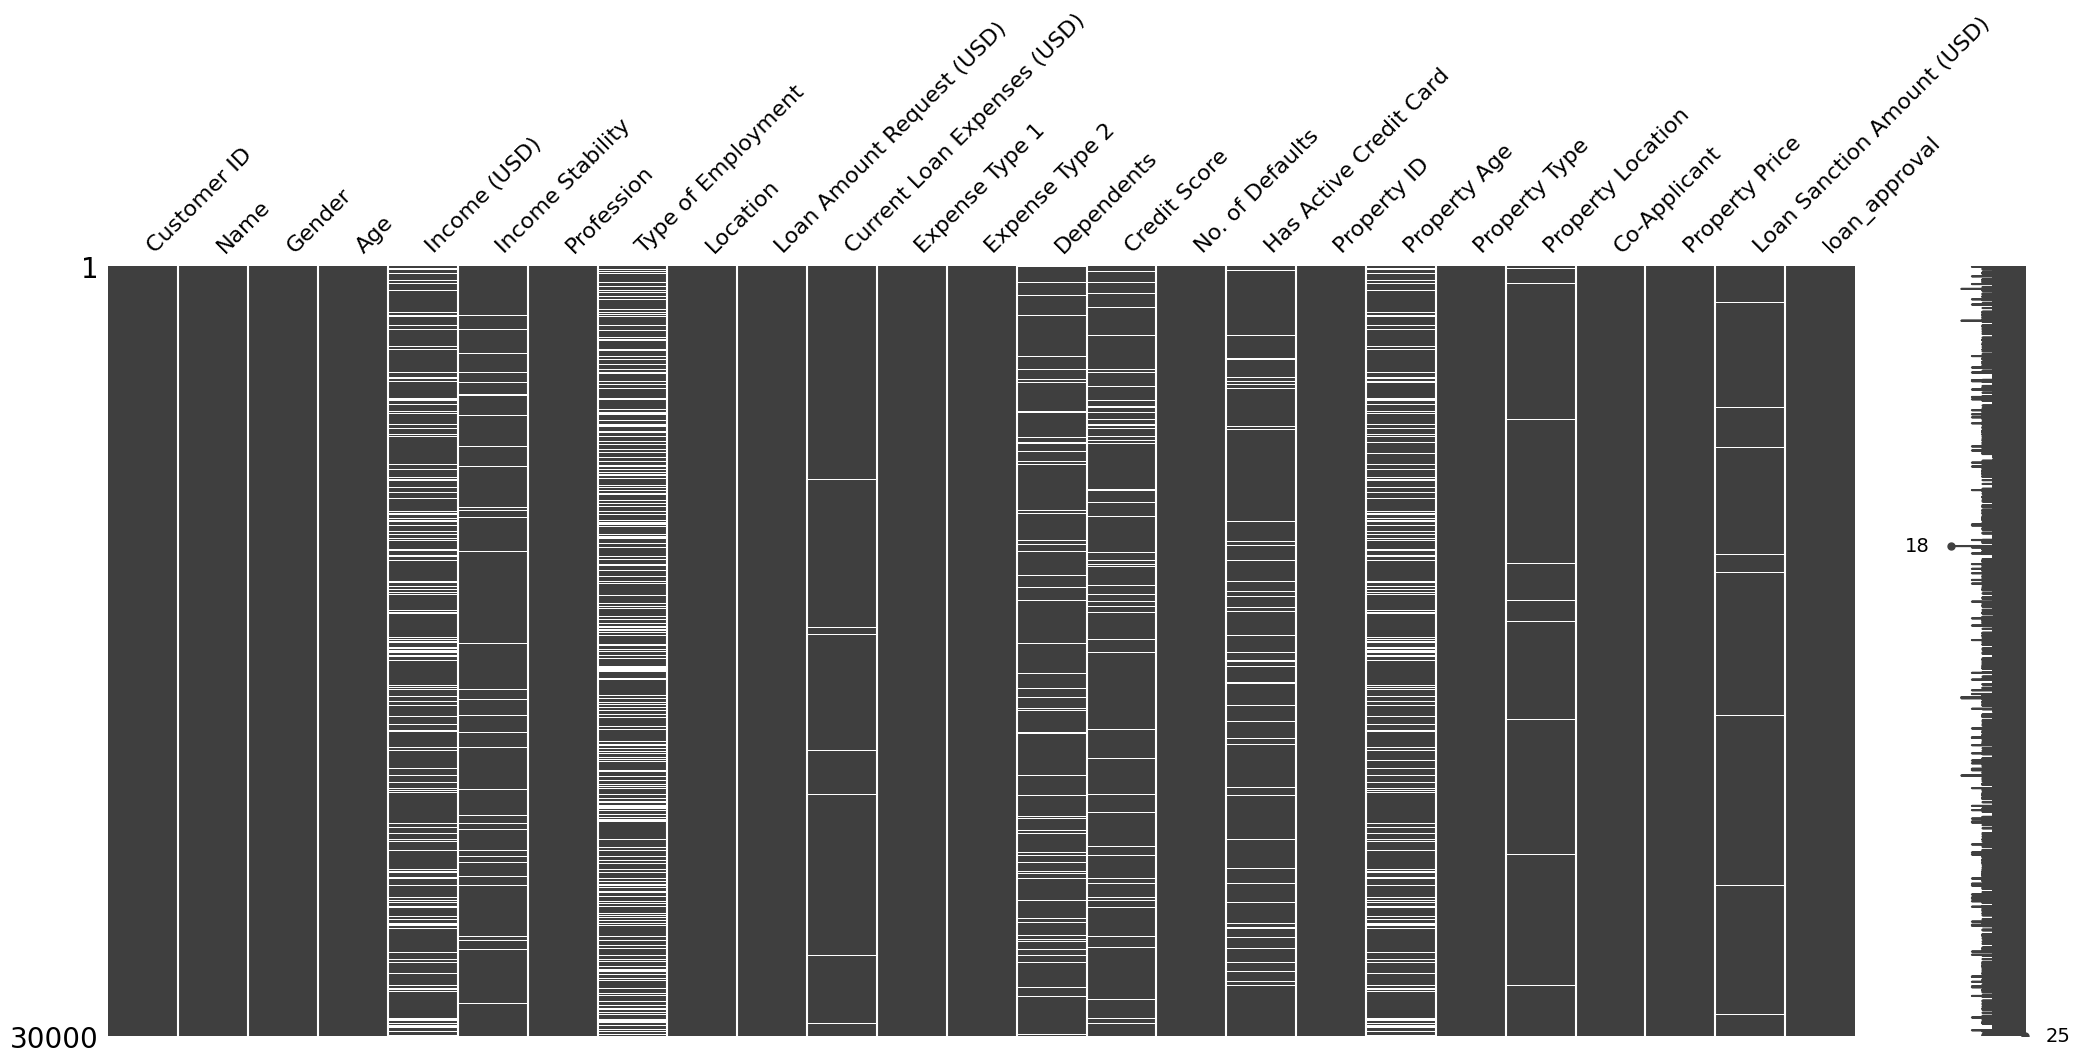

In [23]:
msno.matrix(df)
plt.show()

## Univariate analysis

In [15]:
## Gender

gen_info_feat(df,'Gender')

Description:
count     29947
unique        2
top           M
freq      15053
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
        Count  Frequency (%)
Gender                      
M       15053      50.265469
F       14894      49.734531


#### Inference
- almost same number of males and females

In [16]:
## Age

gen_info_feat(df, 'Age')

Description:
count   30000.000000
mean       40.092300
std        16.045129
min        18.000000
25%        25.000000
50%        40.000000
75%        55.000000
max        65.000000
Name: Age, dtype: float64
**************************************************
Object type:
int64
**************************************************
Skewness:
0.046093801598670575


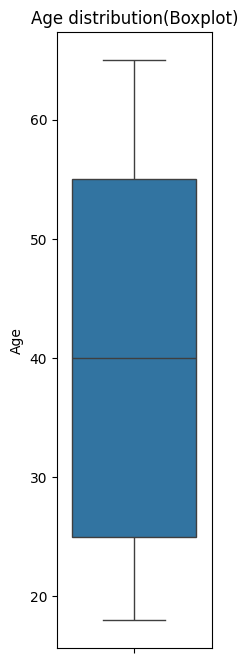

In [17]:
create_box_plot(df, 'Age')

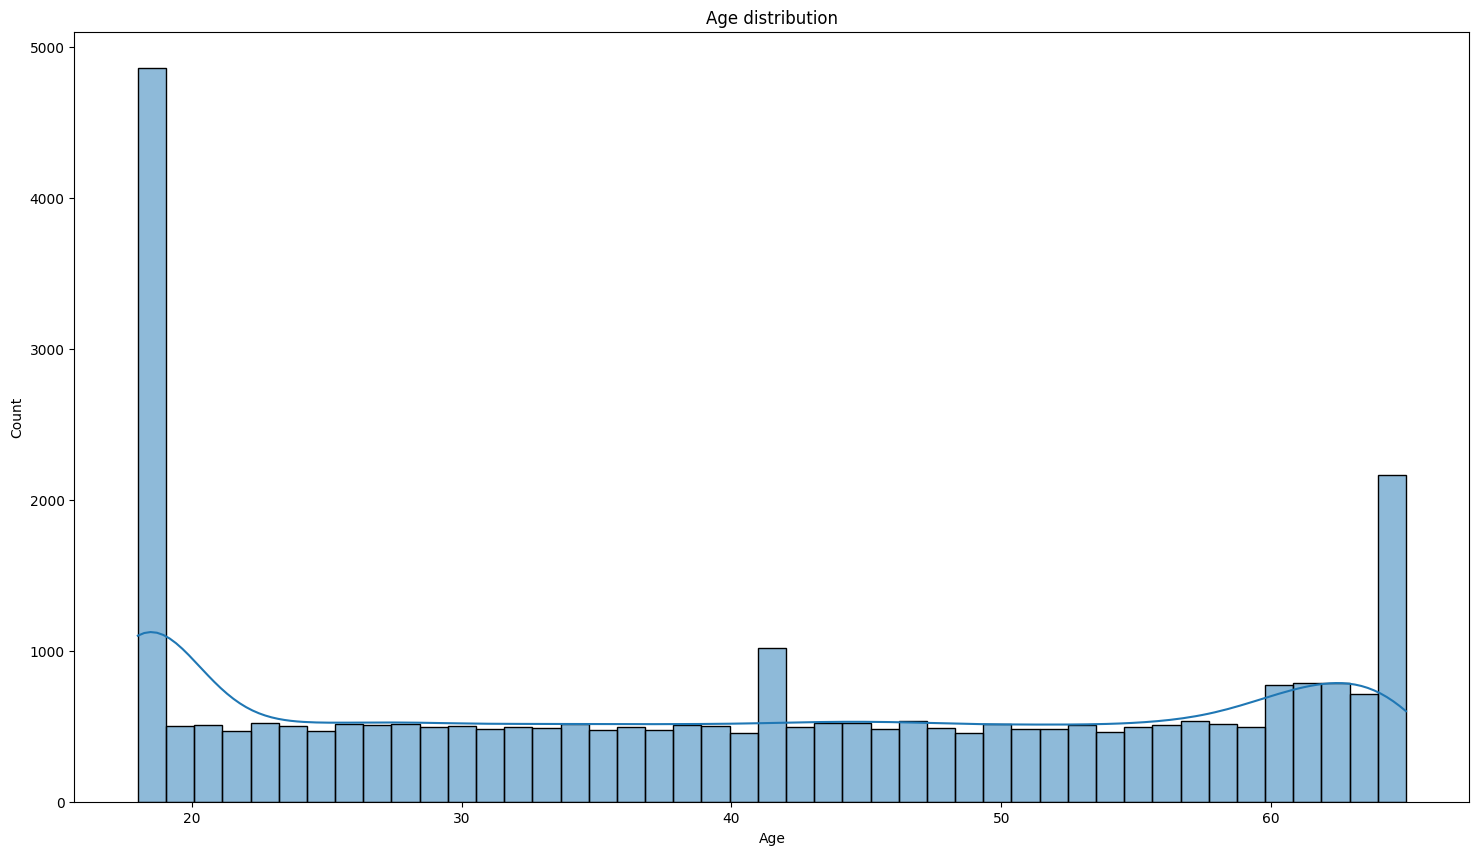

In [18]:
create_hist_plot(df, 'Age', the_bins=45)

### inference
- Age is not normally distributed
- large number of applicants who are 18 and 65 i.e at around the ages people either start applying for jobs or retire
- mean and median is 40 yo

In [19]:
## Income

gen_info_feat(df, 'Income (USD)')

Description:
count     25424.000000
mean       2630.574417
std       11262.723830
min         377.700000
25%        1650.457500
50%        2222.435000
75%        3090.592500
max     1777460.210000
Name: Income (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
154.0017199982858


In [20]:
pd.set_option('display.float_format', '{:.6f}'.format)

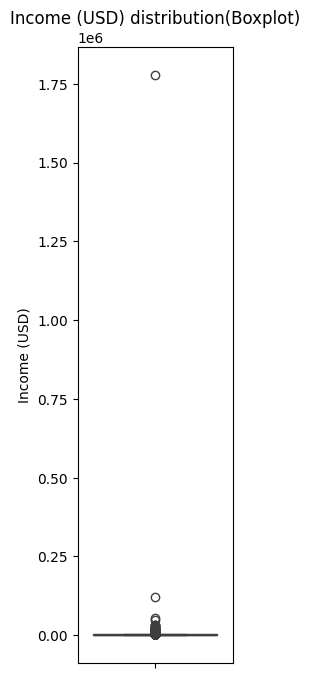

In [21]:
create_box_plot(df, 'Income (USD)')

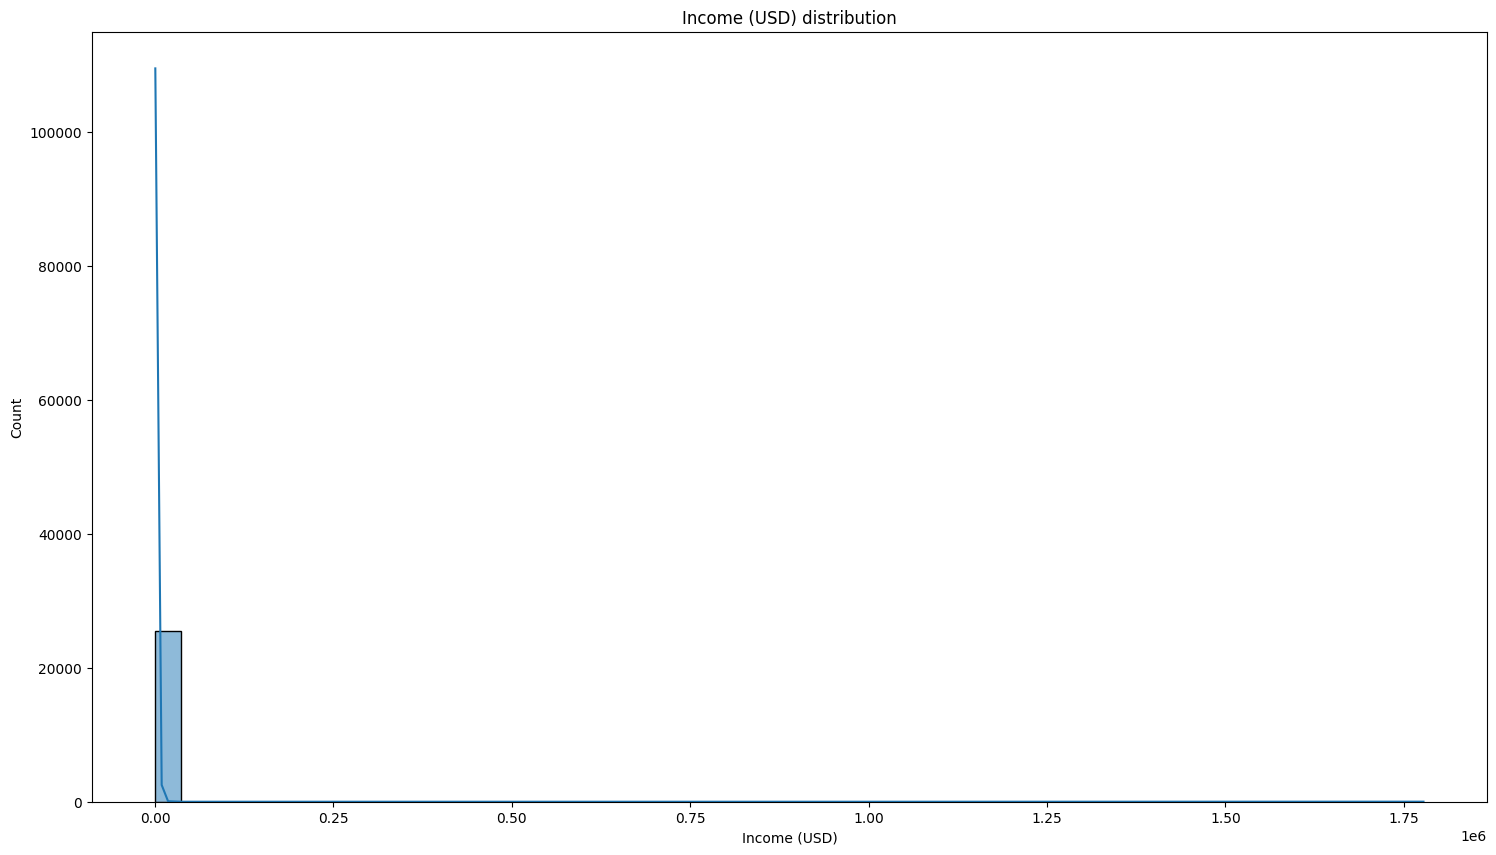

In [22]:
create_hist_plot(df, 'Income (USD)', the_bins=50)

In [24]:
missing_val_norm(df, 'Income (USD)')

'The percentage of missing rows is 15.25 %'

### Interpretation:
- The Income feature has 15% of its data missing.
- The Income is positively skewed.
- The Income has a lot of outliers.
- The median income is $2229.

In [ ]:
## Income Stability

gen_info_feat(df, 'Income Stability')

Description:
count     28317
unique        2
top         Low
freq      25751
Name: Income Stability, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                  Count  Frequency (%)
Income Stability                      
Low               25751      90.938306
High               2566       9.061694


### Interpretation
- Less than 10% of applicants have a high income stability
- 90% of applicants have a low income stability

In [26]:
## Profession

gen_info_feat(df, 'Profession')

Description:
count       30000
unique          8
top       Working
freq        16926
Name: Profession, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Profession                                
Working               16926      56.420000
Commercial associate   7962      26.540000
Pensioner              2740       9.133333
State servant          2366       7.886667
Unemployed                2       0.006667
Businessman               2       0.006667
Student                   1       0.003333
Maternity leave           1       0.003333


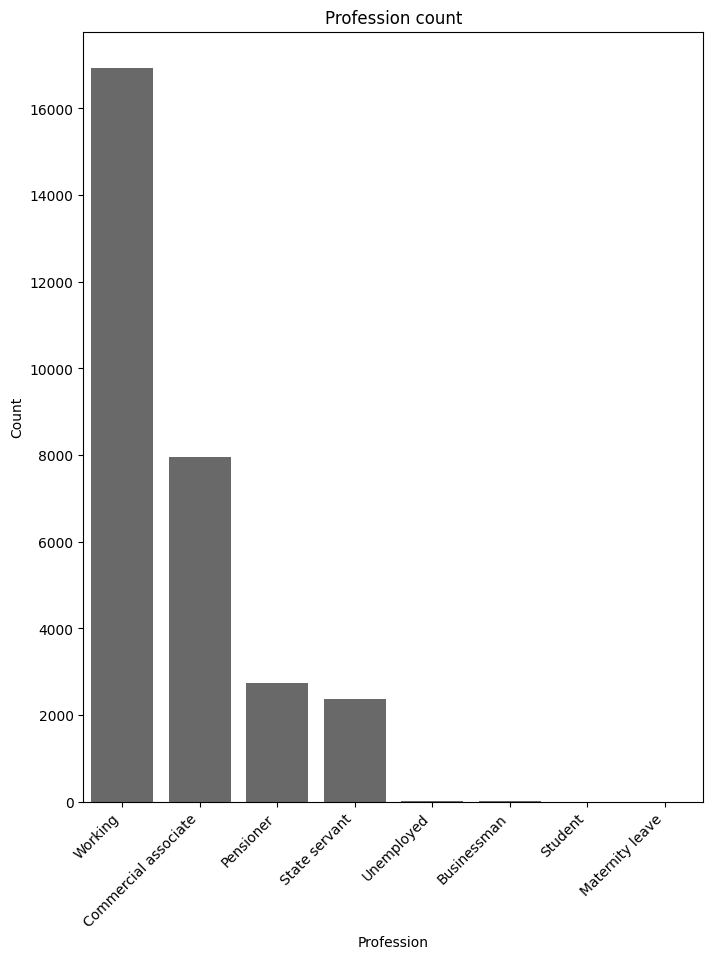

In [27]:
create_bar_plot(df, 'Profession')

### Interpretation

- Most applicants are currently working, the second most represented category is commercial associate.
- We also have a number of applicants that have pensioned and state servant.
- The most unrepresented category are the unemployed, businessman and student.

In [28]:
## Type of employment

gen_info_feat(df, 'Type of Employment')

Description:
count        22730
unique          18
top       Laborers
freq          5578
Name: Type of Employment, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                       Count  Frequency (%)
Type of Employment                         
Laborers                5578      24.540255
Sales staff             3736      16.436428
Core staff              3230      14.210295
Managers                2495      10.976683
Drivers                 1606       7.065552
Accountants             1379       6.066872
High skill tech staff   1307       5.750110
Medicine staff           864       3.801144
Security staff           579       2.547294
Cooking staff            566       2.490101
Private service staff    342       1.504619
Cleaning staff           341       1.500220
Low-skill Laborers       162       0.712714
Secretaries              161       0.708315
Waiters/barmen staff     149    

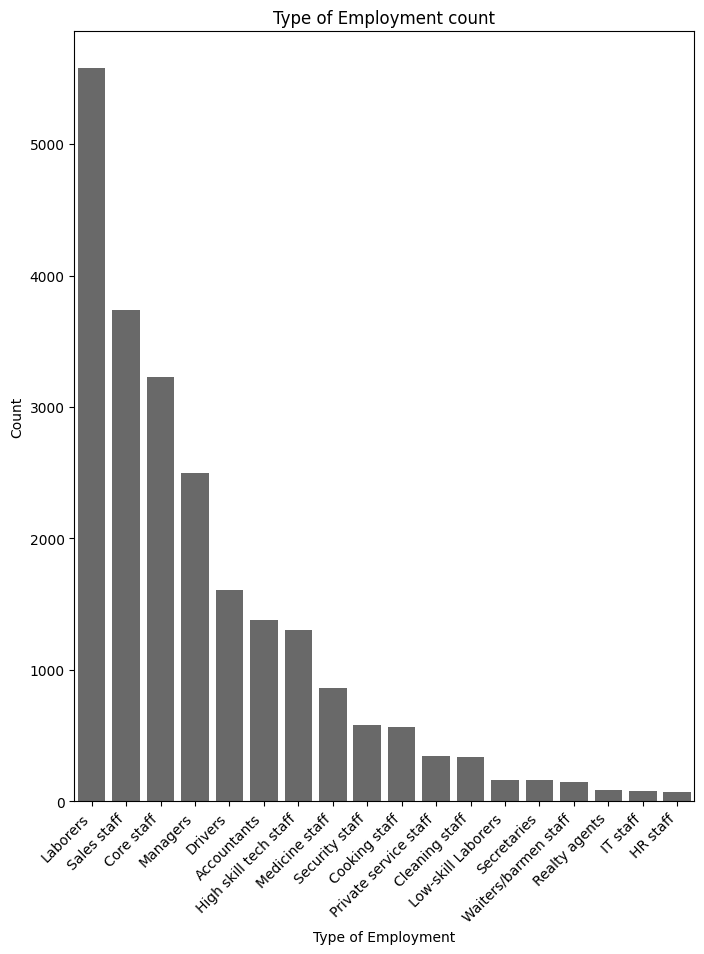

In [30]:
create_bar_plot(df, 'Type of Employment')

## Interpretation:
- Laborers, sales staff, core staff and managers are the most represented.
- The least represented employment are secretaries, low-skill laborers, waiters/barmen staff, realty agents, IT staff, HR staff.

In [31]:
# Location

gen_info_feat(df, 'Location')

Description:
count          30000
unique             3
top       Semi-Urban
freq           21563
Name: Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
            Count  Frequency (%)
Location                        
Semi-Urban  21563      71.876667
Rural        5338      17.793333
Urban        3099      10.330000


## Interpretation

- 71 % applicants live in semi-urban areas
- 17 % applicants live in rural areas
- 10 % applicants live in urban areas

In [32]:
## Loan amount request

gen_info_feat(df, 'Loan Amount Request (USD)')

Description:
count    30000.000000
mean     88826.333855
std      59536.949605
min       6048.240000
25%      41177.755000
50%      75128.075000
75%     119964.605000
max     621497.820000
Name: Loan Amount Request (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.2603921833589773


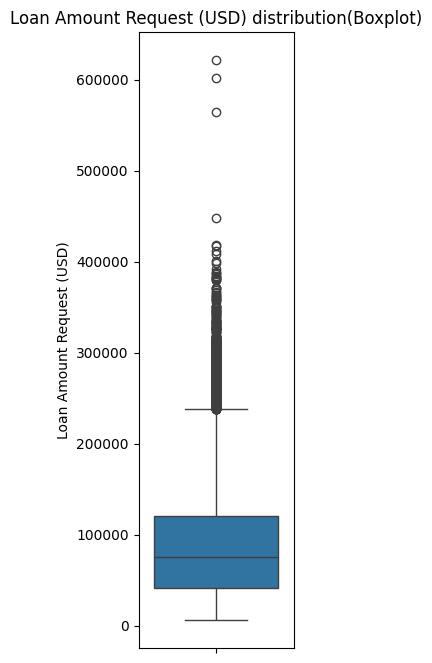

In [33]:
create_box_plot(df, 'Loan Amount Request (USD)')

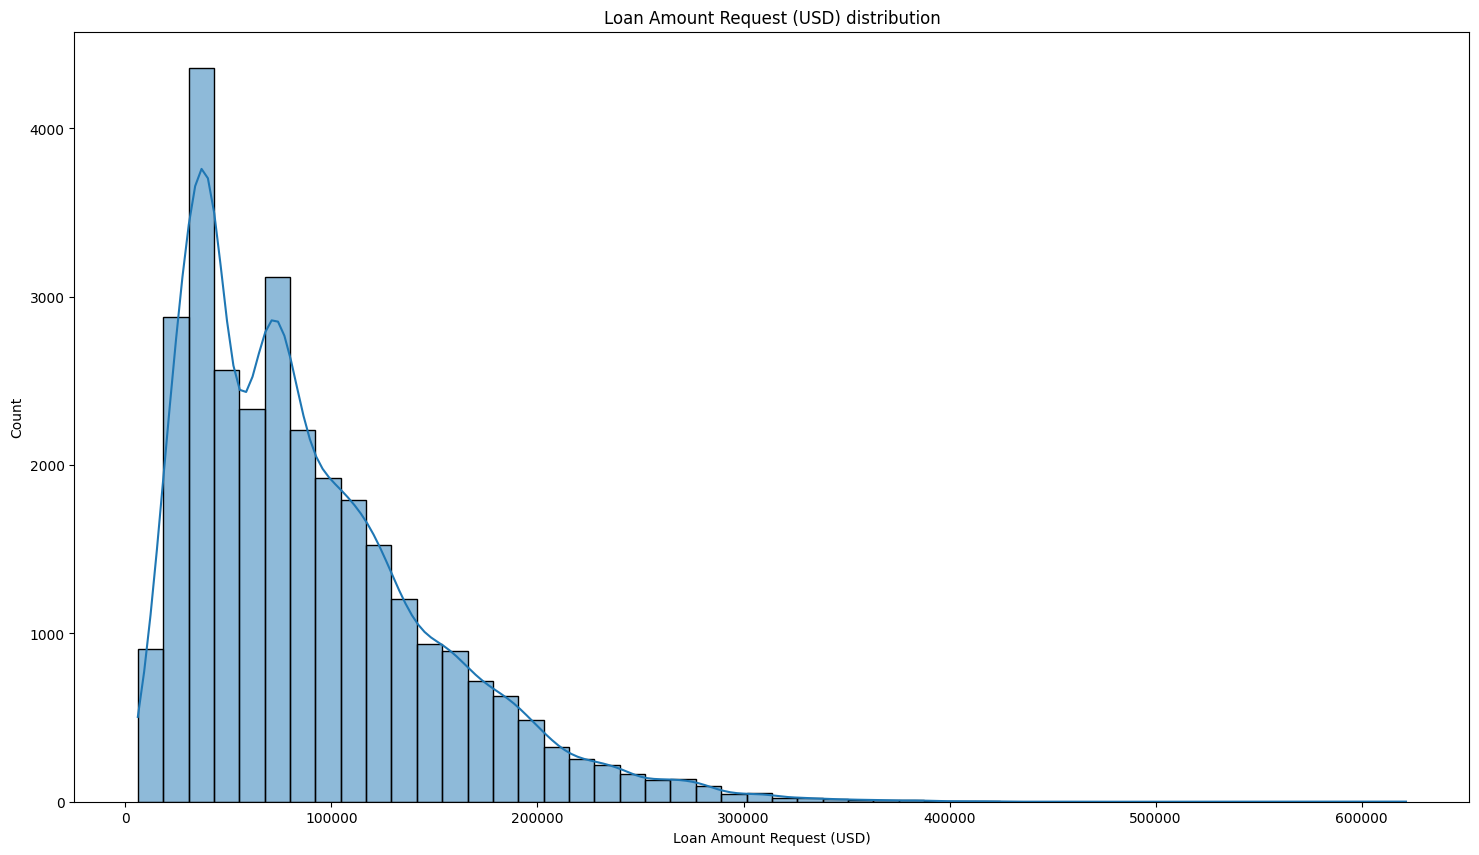

In [35]:
create_hist_plot(df, 'Loan Amount Request (USD)')

### Interpretation

- the median loan amount request is $75128.075000.
- A large number of outliers
- the loan amount request is positively skewed


In [36]:
# current loan expenses
gen_info_feat(df, 'Current Loan Expenses (USD)')

Description:
count   29828.000000
mean      400.936876
std       242.545375
min      -999.000000
25%       247.667500
50%       375.205000
75%       521.292500
max      3840.880000
Name: Current Loan Expenses (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
0.04432815526113482


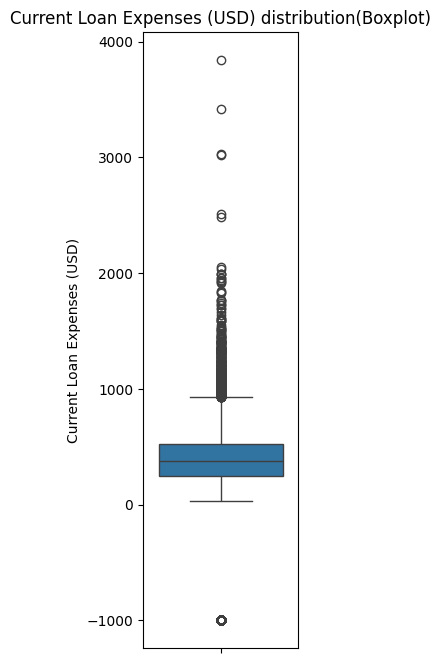

In [37]:
create_box_plot(df, 'Current Loan Expenses (USD)')

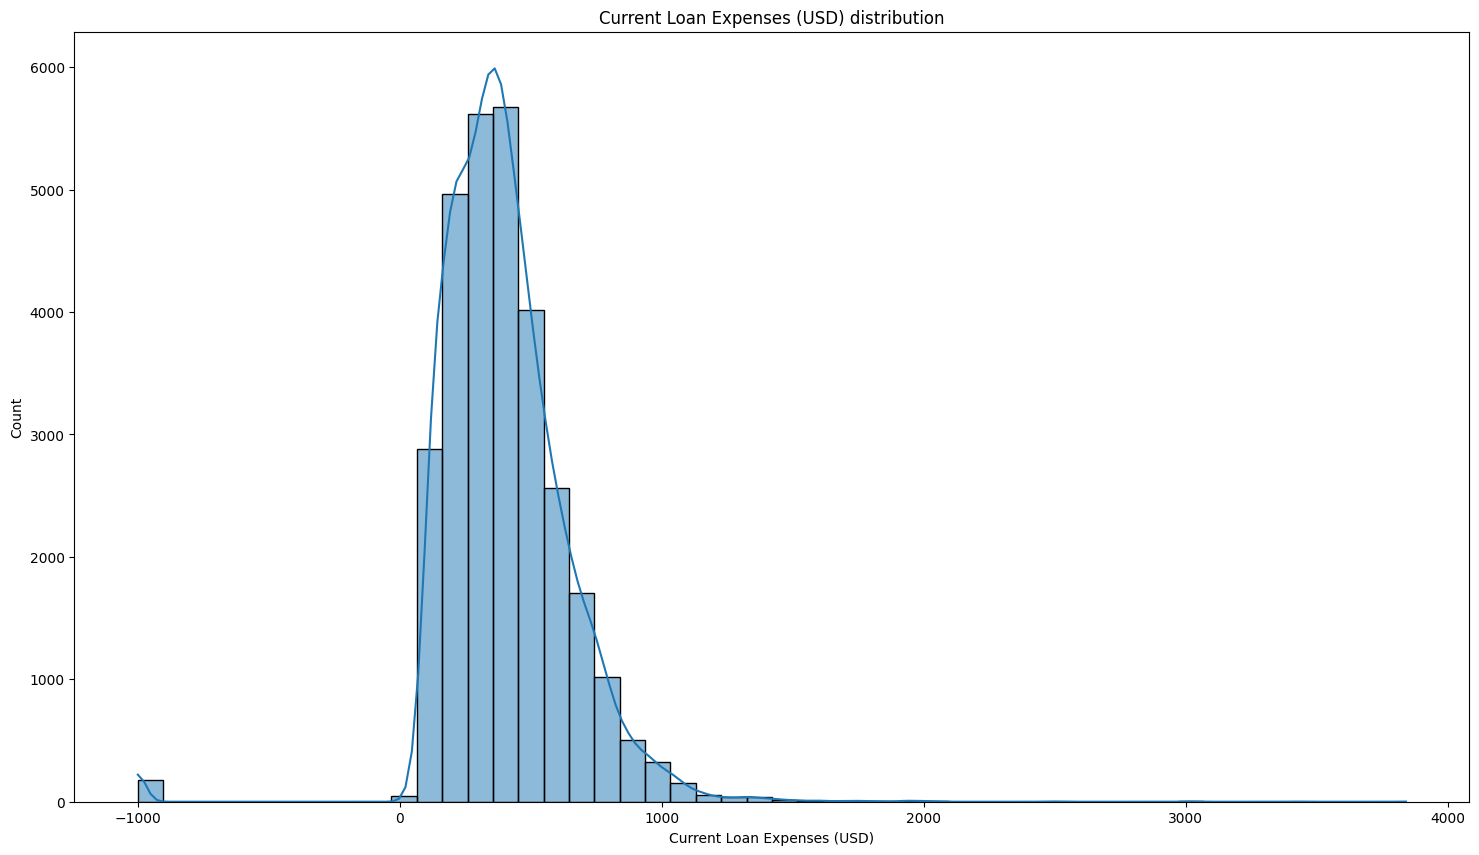

In [38]:
create_hist_plot(df, 'Current Loan Expenses (USD)')

### Interpretation

- the mean current loan expenses is $400.936876
- the median of current loan expenses is 375.205000
- the distribution is slightly positively skewed

In [39]:
# Expense type 1

gen_info_feat(df, 'Expense Type 1')

Description:
count     30000
unique        2
top           N
freq      19214
Name: Expense Type 1, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                Count  Frequency (%)
Expense Type 1                      
N               19214      64.046667
Y               10786      35.953333


### Interpretation

- about 36% of applicants have type 1 expense

In [40]:
## Expense Type 2
gen_info_feat(df, 'Expense Type 2')

Description:
count     30000
unique        2
top           Y
freq      20180
Name: Expense Type 2, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                Count  Frequency (%)
Expense Type 2                      
Y               20180      67.266667
N                9820      32.733333


### interpretation

- majority of applicants have type 2 expenses

### How many people have both type 1 and tpye 2 expense in common

In [43]:
df1 = df.copy()
df1['expense1'] = (df1['Expense Type 1']=='Y').astype(int)
df1['expense2'] = (df1['Expense Type 2']=='Y').astype(int)

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df1['expense1'], df1['expense2'])
cm


array([[ 6460, 12754],
       [ 3360,  7426]])

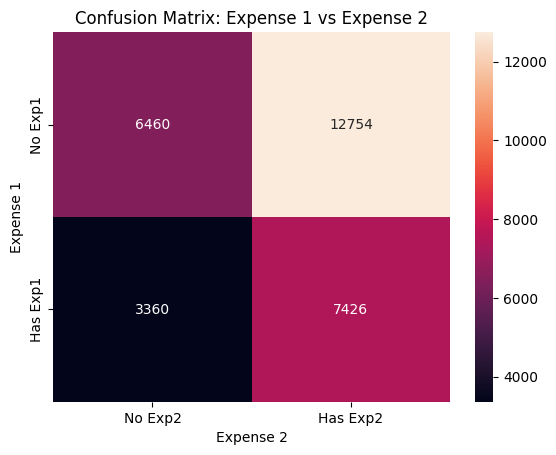

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    xticklabels=['No Exp2', 'Has Exp2'],
    yticklabels=['No Exp1', 'Has Exp1']
)
plt.xlabel("Expense 2")
plt.ylabel("Expense 1")
plt.title("Confusion Matrix: Expense 1 vs Expense 2")
plt.show()


In [47]:
ct = pd.crosstab(df1['expense1'], df1['expense2'])
ct_pct = ct / ct.values.sum() * 100
ct_pct

expense2,0,1
expense1,,
0,21.533333,42.513333
1,11.200000,24.753333


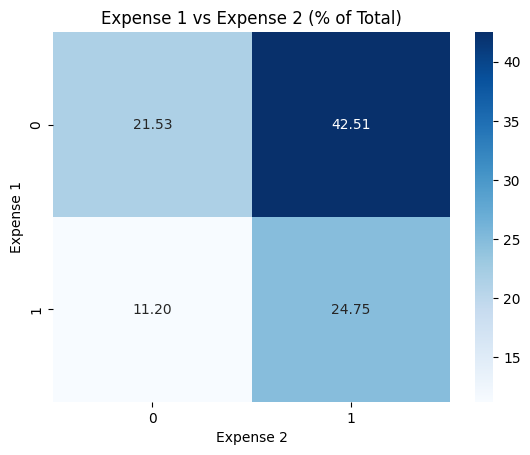

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    ct_pct,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)
plt.xlabel("Expense 2")
plt.ylabel("Expense 1")
plt.title("Expense 1 vs Expense 2 (% of Total)")
plt.show()


### Inference

- about 22 % od applicants dont have type 1 and type 2 expenses
- about 25 % of applicants have both type 1 and type 2 expenses
- 

In [49]:
# dependents
gen_info_feat(df, 'Dependents')

Description:
count   27507.000000
mean        2.253027
std         0.951162
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: Dependents, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
            Count  Frequency (%)
Dependents                      
2.000000    13108      47.653325
3.000000     5719      20.791071
1.000000     5544      20.154870
4.000000     2704       9.830225
5.000000      372       1.352383
6.000000       50       0.181772
7.000000        7       0.025448
8.000000        1       0.003635
10.000000       1       0.003635
14.000000       1       0.003635


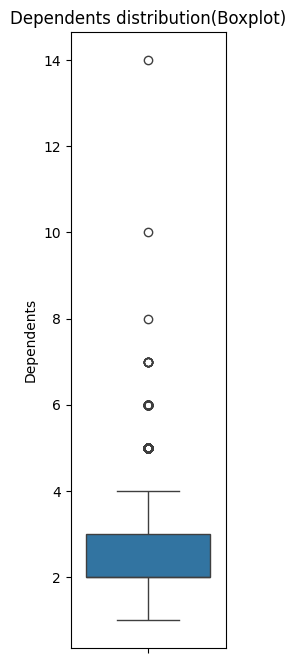

In [50]:
create_box_plot(df, 'Dependents')

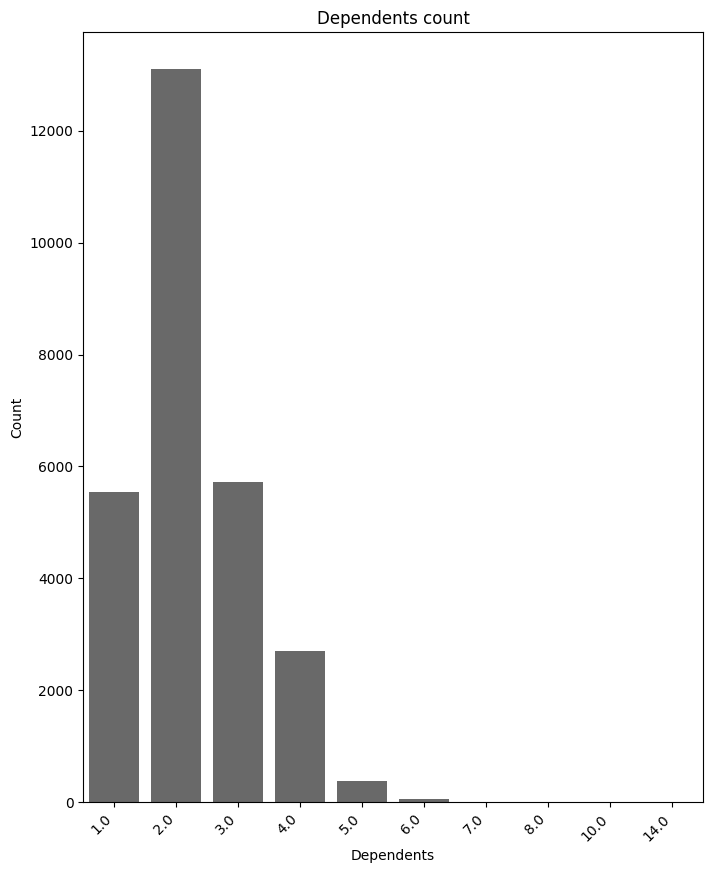

In [51]:
create_bar_plot(df, 'Dependents')

### Inference

- Most applicants have 2 dependets followed by 3 and 1.

In [52]:
# Credit Score

gen_info_feat(df, 'Credit Score')

Description:
count   28297.000000
mean      739.885381
std        72.163846
min       580.000000
25%       681.880000
50%       739.820000
75%       799.120000
max       896.260000
Name: Credit Score, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
-0.020255169213215216


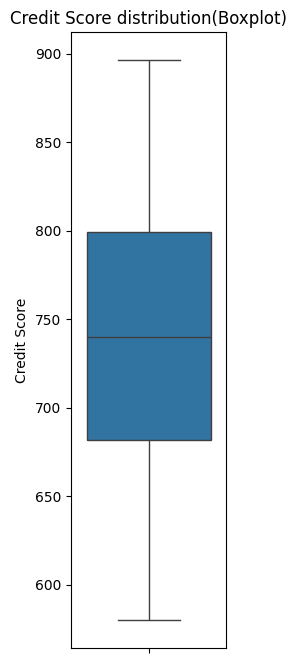

In [53]:
create_box_plot(df, 'Credit Score')

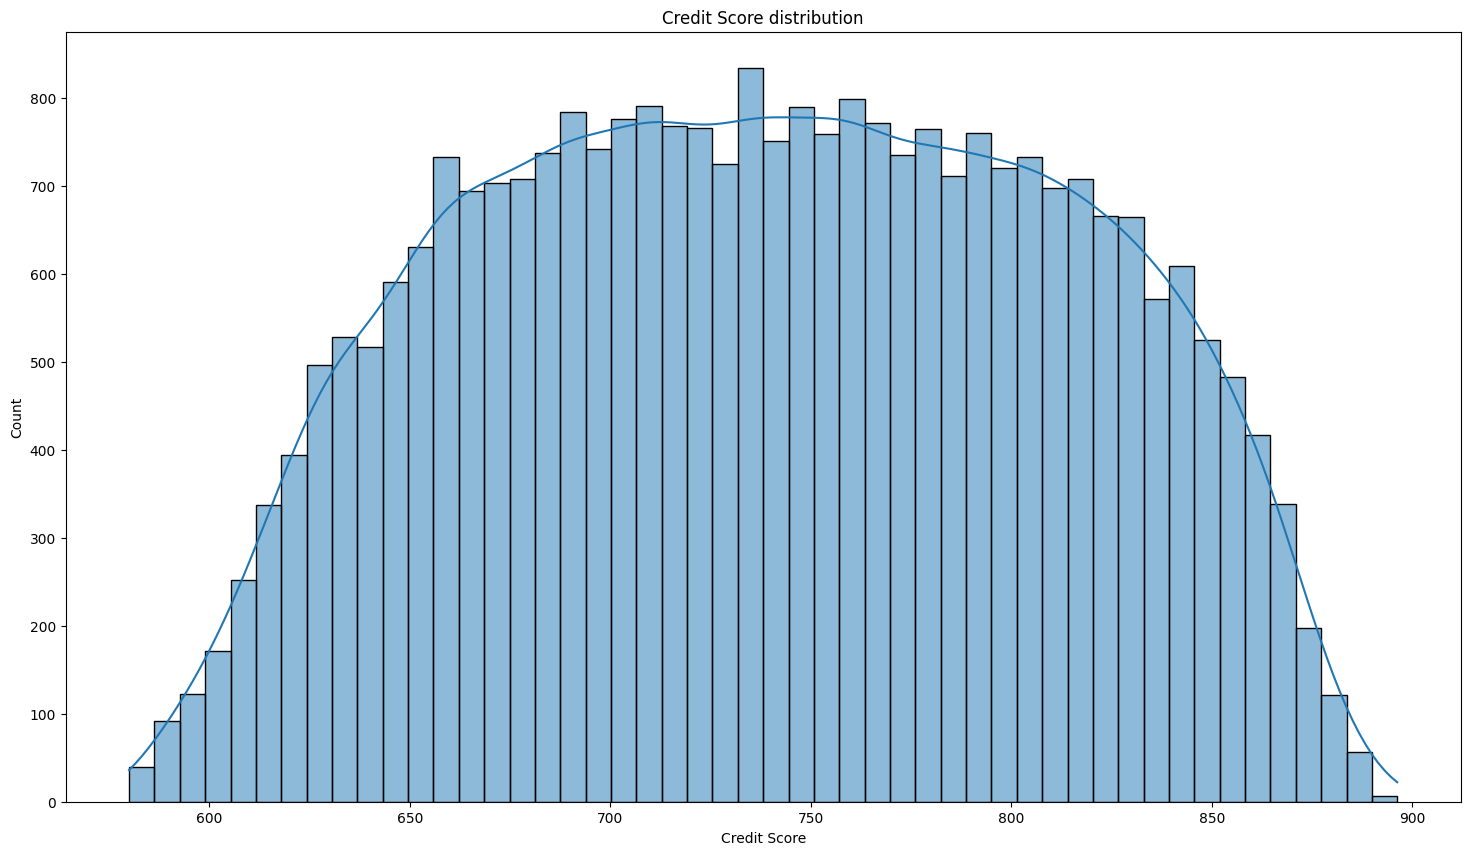

In [55]:
create_hist_plot(df, 'Credit Score')

### Interpretation:
- The mean and median of applicants's credit score are close in value are almost = 739
- The credit score does not seems to be skewed but it is not normally distributed

In [56]:
# Number of defaults

gen_info_feat(df, 'No. of Defaults')

Description:
count   30000.000000
mean        0.193933
std         0.395384
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: No. of Defaults, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
                 Count  Frequency (%)
No. of Defaults                      
0                24182      80.606667
1                 5818      19.393333


### Inference 

- more than 80 % of people havent defaulted on loan

In [57]:
# Has active credit card

gen_info_feat(df, 'Has Active Credit Card')

Description:
count      28434
unique         3
top       Active
freq        9771
Name: Has Active Credit Card, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                        Count  Frequency (%)
Has Active Credit Card                      
Active                   9771      34.363790
Inactive                 9466      33.291130
Unpossessed              9197      32.345080


### Interpretation

- We have almost an equal amount of people with an active, inactive and unpossessed credit card.

In [58]:
# Property age

gen_info_feat(df, 'Property Age')

Description:
count     68.856947
mean       7.203612
std       30.999800
min        1.034086
25%        4.518686
50%        6.086927
75%        8.463812
max     4866.420835
Name: Property Age, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
153.2196101099395


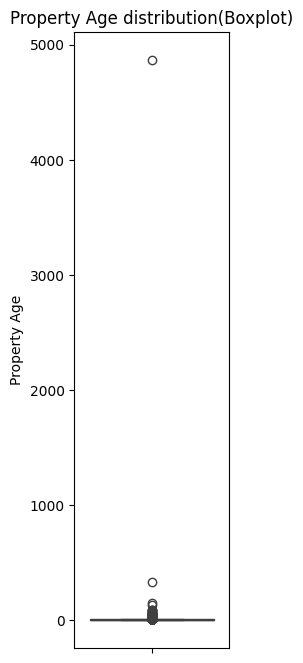

In [59]:
create_box_plot(df, 'Property Age')

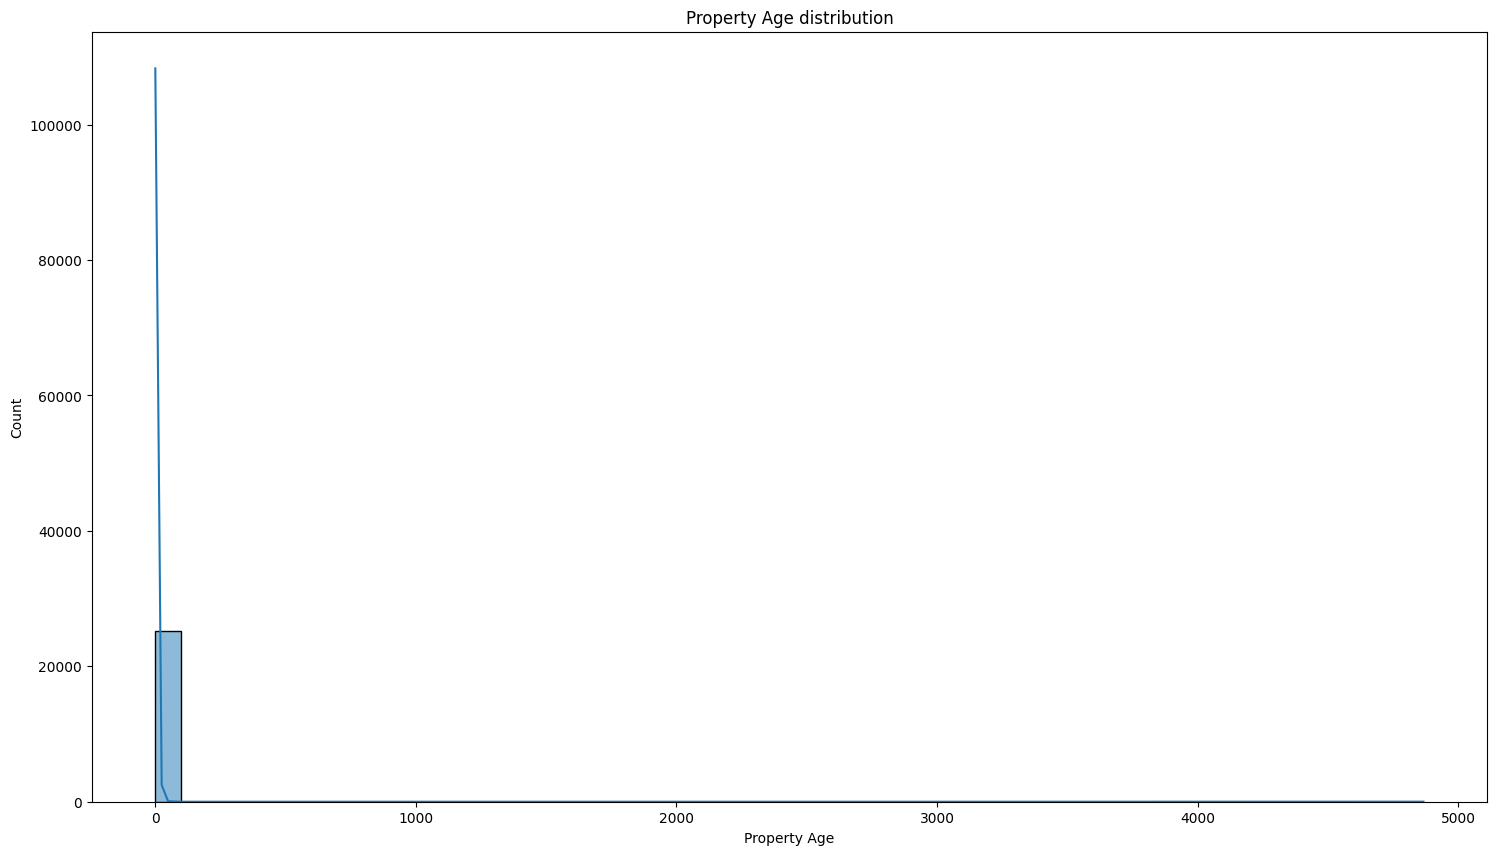

In [60]:
create_hist_plot(df, 'Property Age')

### Interpretation
- Assuming that the property age is expressed in days, most of properties have a median age of 6.09 ~6.1 years
- The property age distribution is positively skewed 

In [61]:
# Property type

gen_info_feat(df,'Property Type')

Description:
count   30000.000000
mean        2.460067
std         1.118562
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Property Type, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
               Count  Frequency (%)
Property Type                      
1               7863      26.210000
2               7650      25.500000
3               7309      24.363333
4               7178      23.926667


### Inference
- We have almost an equal amount of property types, each with about 25%

In [62]:
# Property location

gen_info_feat(df, 'Property Location')

Description:
count          29644
unique             3
top       Semi-Urban
freq           10387
Name: Property Location, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                   Count  Frequency (%)
Property Location                      
Semi-Urban         10387      35.039131
Rural              10041      33.871947
Urban               9216      31.088922


### Inference
- all the 3 types of properties are almost equally distruibuted 

In [63]:
# Co-applicants
gen_info_feat(df, 'Co-Applicant')

Description:
count   30000.000000
mean       -4.743867
std        74.614593
min      -999.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Co-Applicant, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
              Count  Frequency (%)
Co-Applicant                      
 1            25516      85.053333
 0             4316      14.386667
-999            168       0.560000


### Interpretation:
- Most of applicants have a co-applicants (~85%)
- 14% of applicants don't have a co-applicant
- The rest are unknown (~0.5%)

In [64]:
# Property price

gen_info_feat(df,'Property Price')

Description:
count     30000.000000
mean     131759.680252
std       93549.548104
min        -999.000000
25%       60572.160000
50%      109993.610000
75%      178880.720000
max     1077966.730000
Name: Property Price, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.4169646295074756


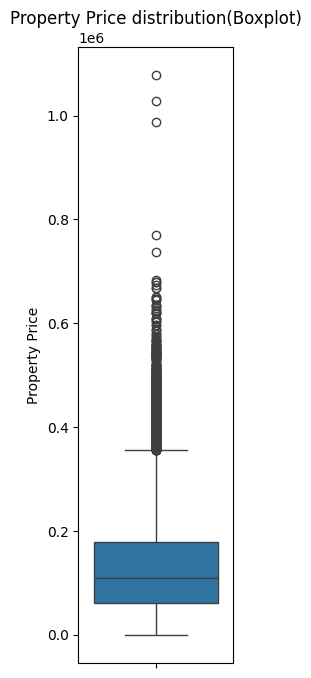

In [65]:
create_box_plot(df, 'Property Price')

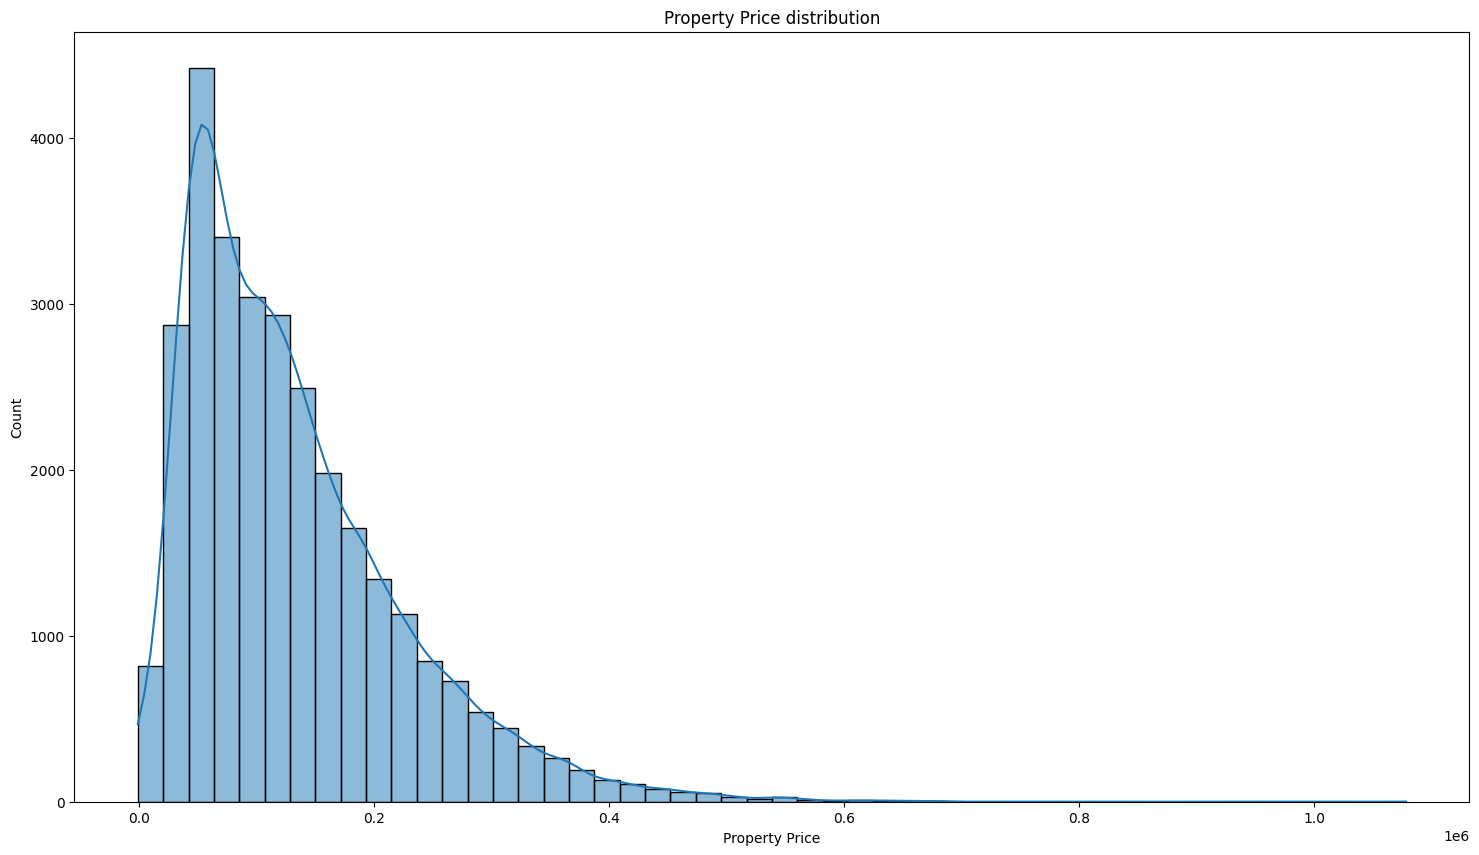

In [66]:
create_hist_plot(df, 'Property Price')

### Interpretation:
- The median property price is $109993.61
- there are quite a number of outliers
- The distribution of the property price is skewed to the right indicating a large number of prices are on the lower end of price spectrum. 

In [67]:
# Loan Sanctioned Amount

gen_info_feat(df, 'Loan Sanction Amount (USD)')

Description:
count    29660.000000
mean     47649.342208
std      48221.146686
min       -999.000000
25%          0.000000
50%      35209.395000
75%      74261.250000
max     481907.320000
Name: Loan Sanction Amount (USD), dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.2299390309619023


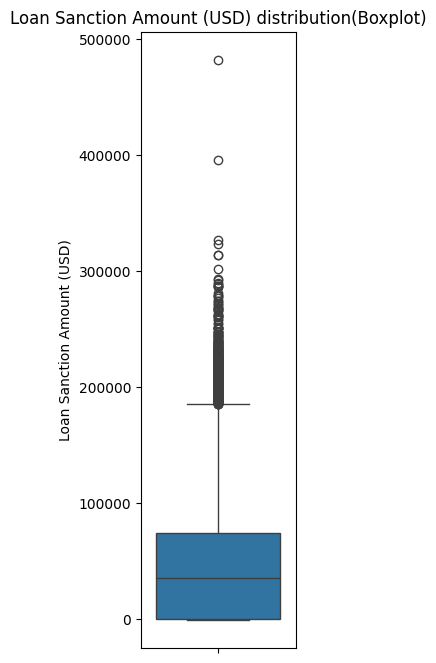

In [68]:
create_box_plot(df, 'Loan Sanction Amount (USD)')

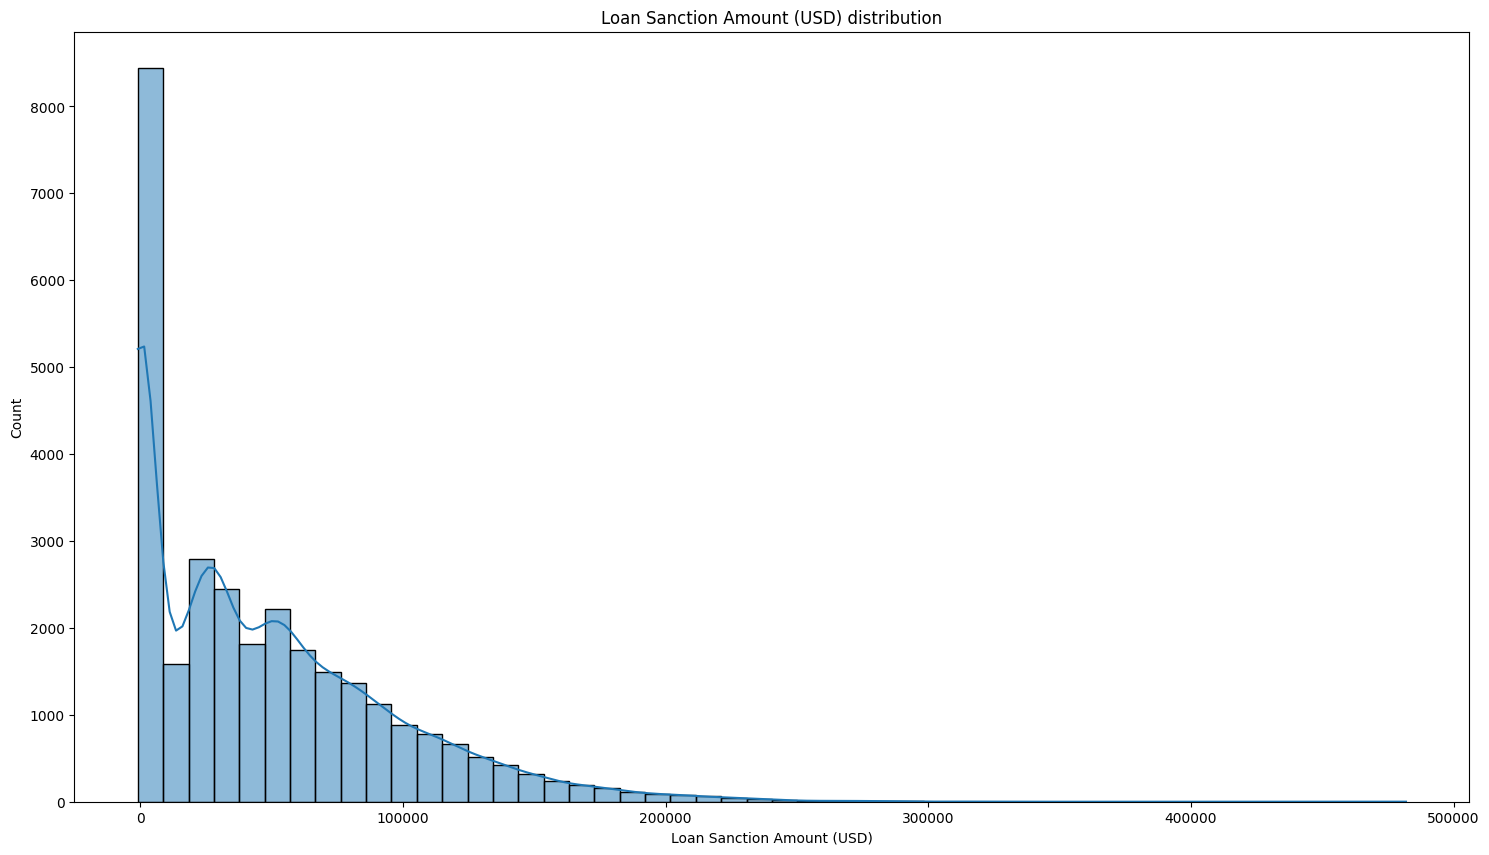

In [69]:
create_hist_plot(df, 'Loan Sanction Amount (USD)')

### Interpretation:
- The median loan sanction amount is $35209.395
- Large numbers of outliers
- The distribution of the loan sanction amount is skewed to the right. We can see from the histogram that there are a large number of loans sanctioned that are smaller denomination. these are causing the median to be higher than the values of vast majority of loans sanctioned

In [71]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)', 'loan_approval'],
      dtype='object')

In [72]:
# Loan approved

gen_info_feat(df, 'loan_approval')

Description:
count        30000
unique           2
top       approved
freq         22135
Name: loan_approval, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
               Count  Frequency (%)
loan_approval                      
approved       22135      73.783333
not_approved    7865      26.216667


### Interpretation
- from above we observe that about 74 % loans were approved and about 26 % were not approved

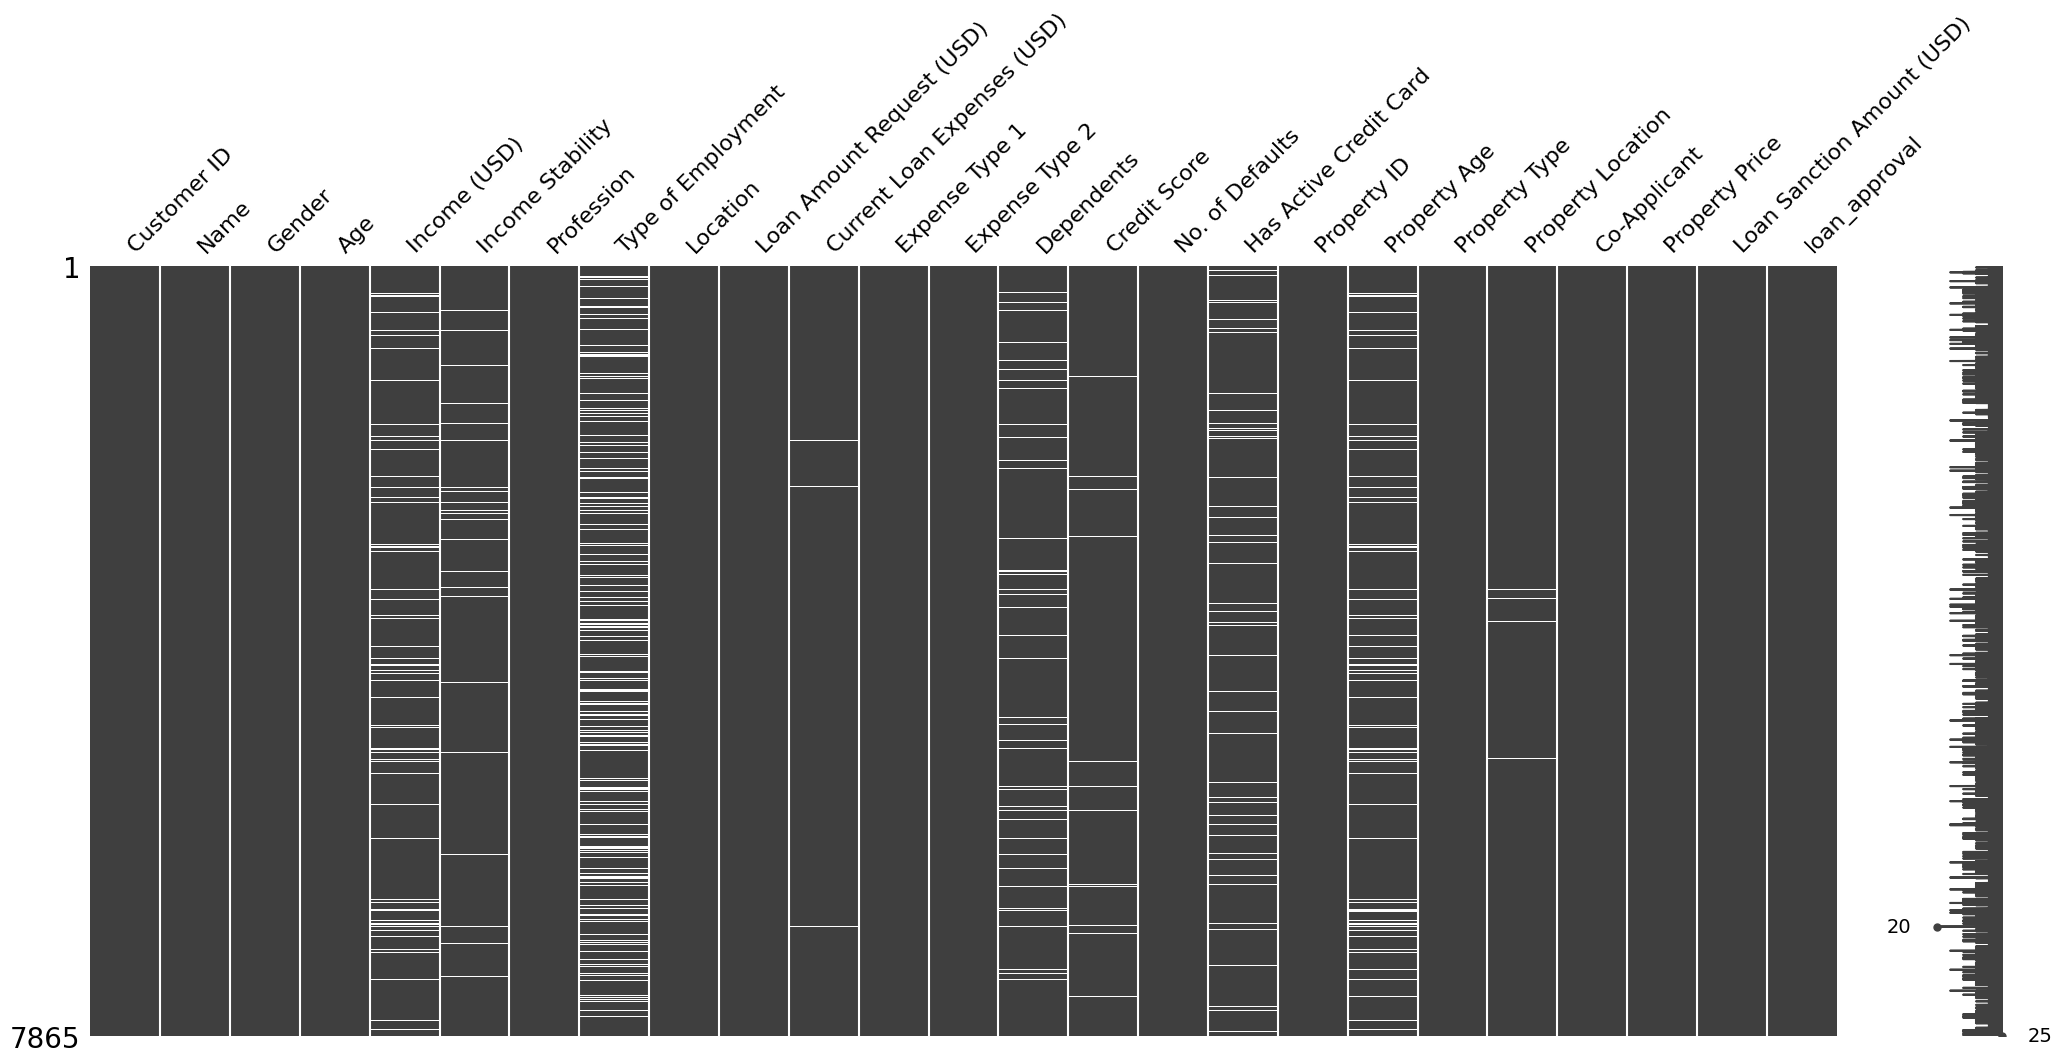

In [74]:
msno.matrix(df[df['loan_approval'] == 'not_approved'])
plt.show()


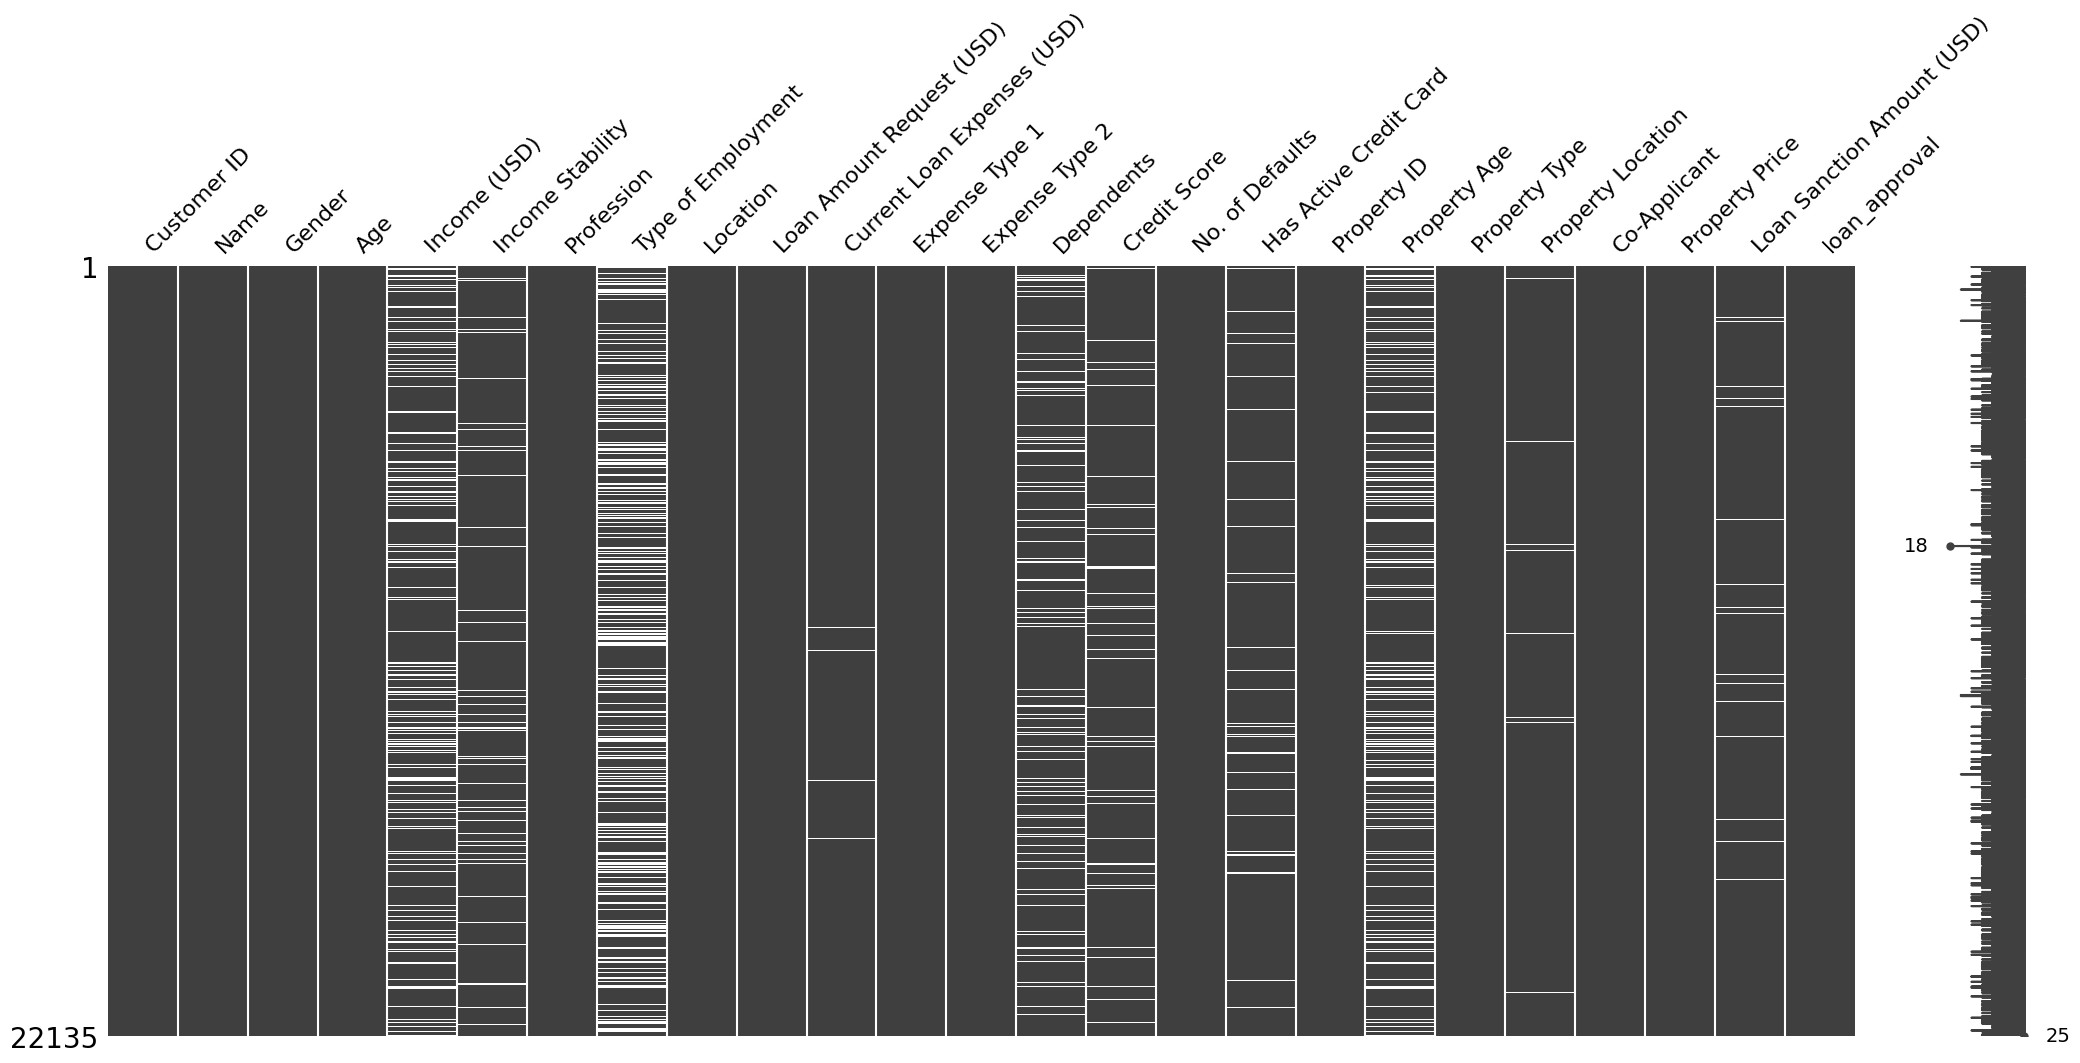

In [75]:
msno.matrix(df[df['loan_approval'] == 'approved'])
plt.show()


## Bivariate Analysis

### Scatter plot

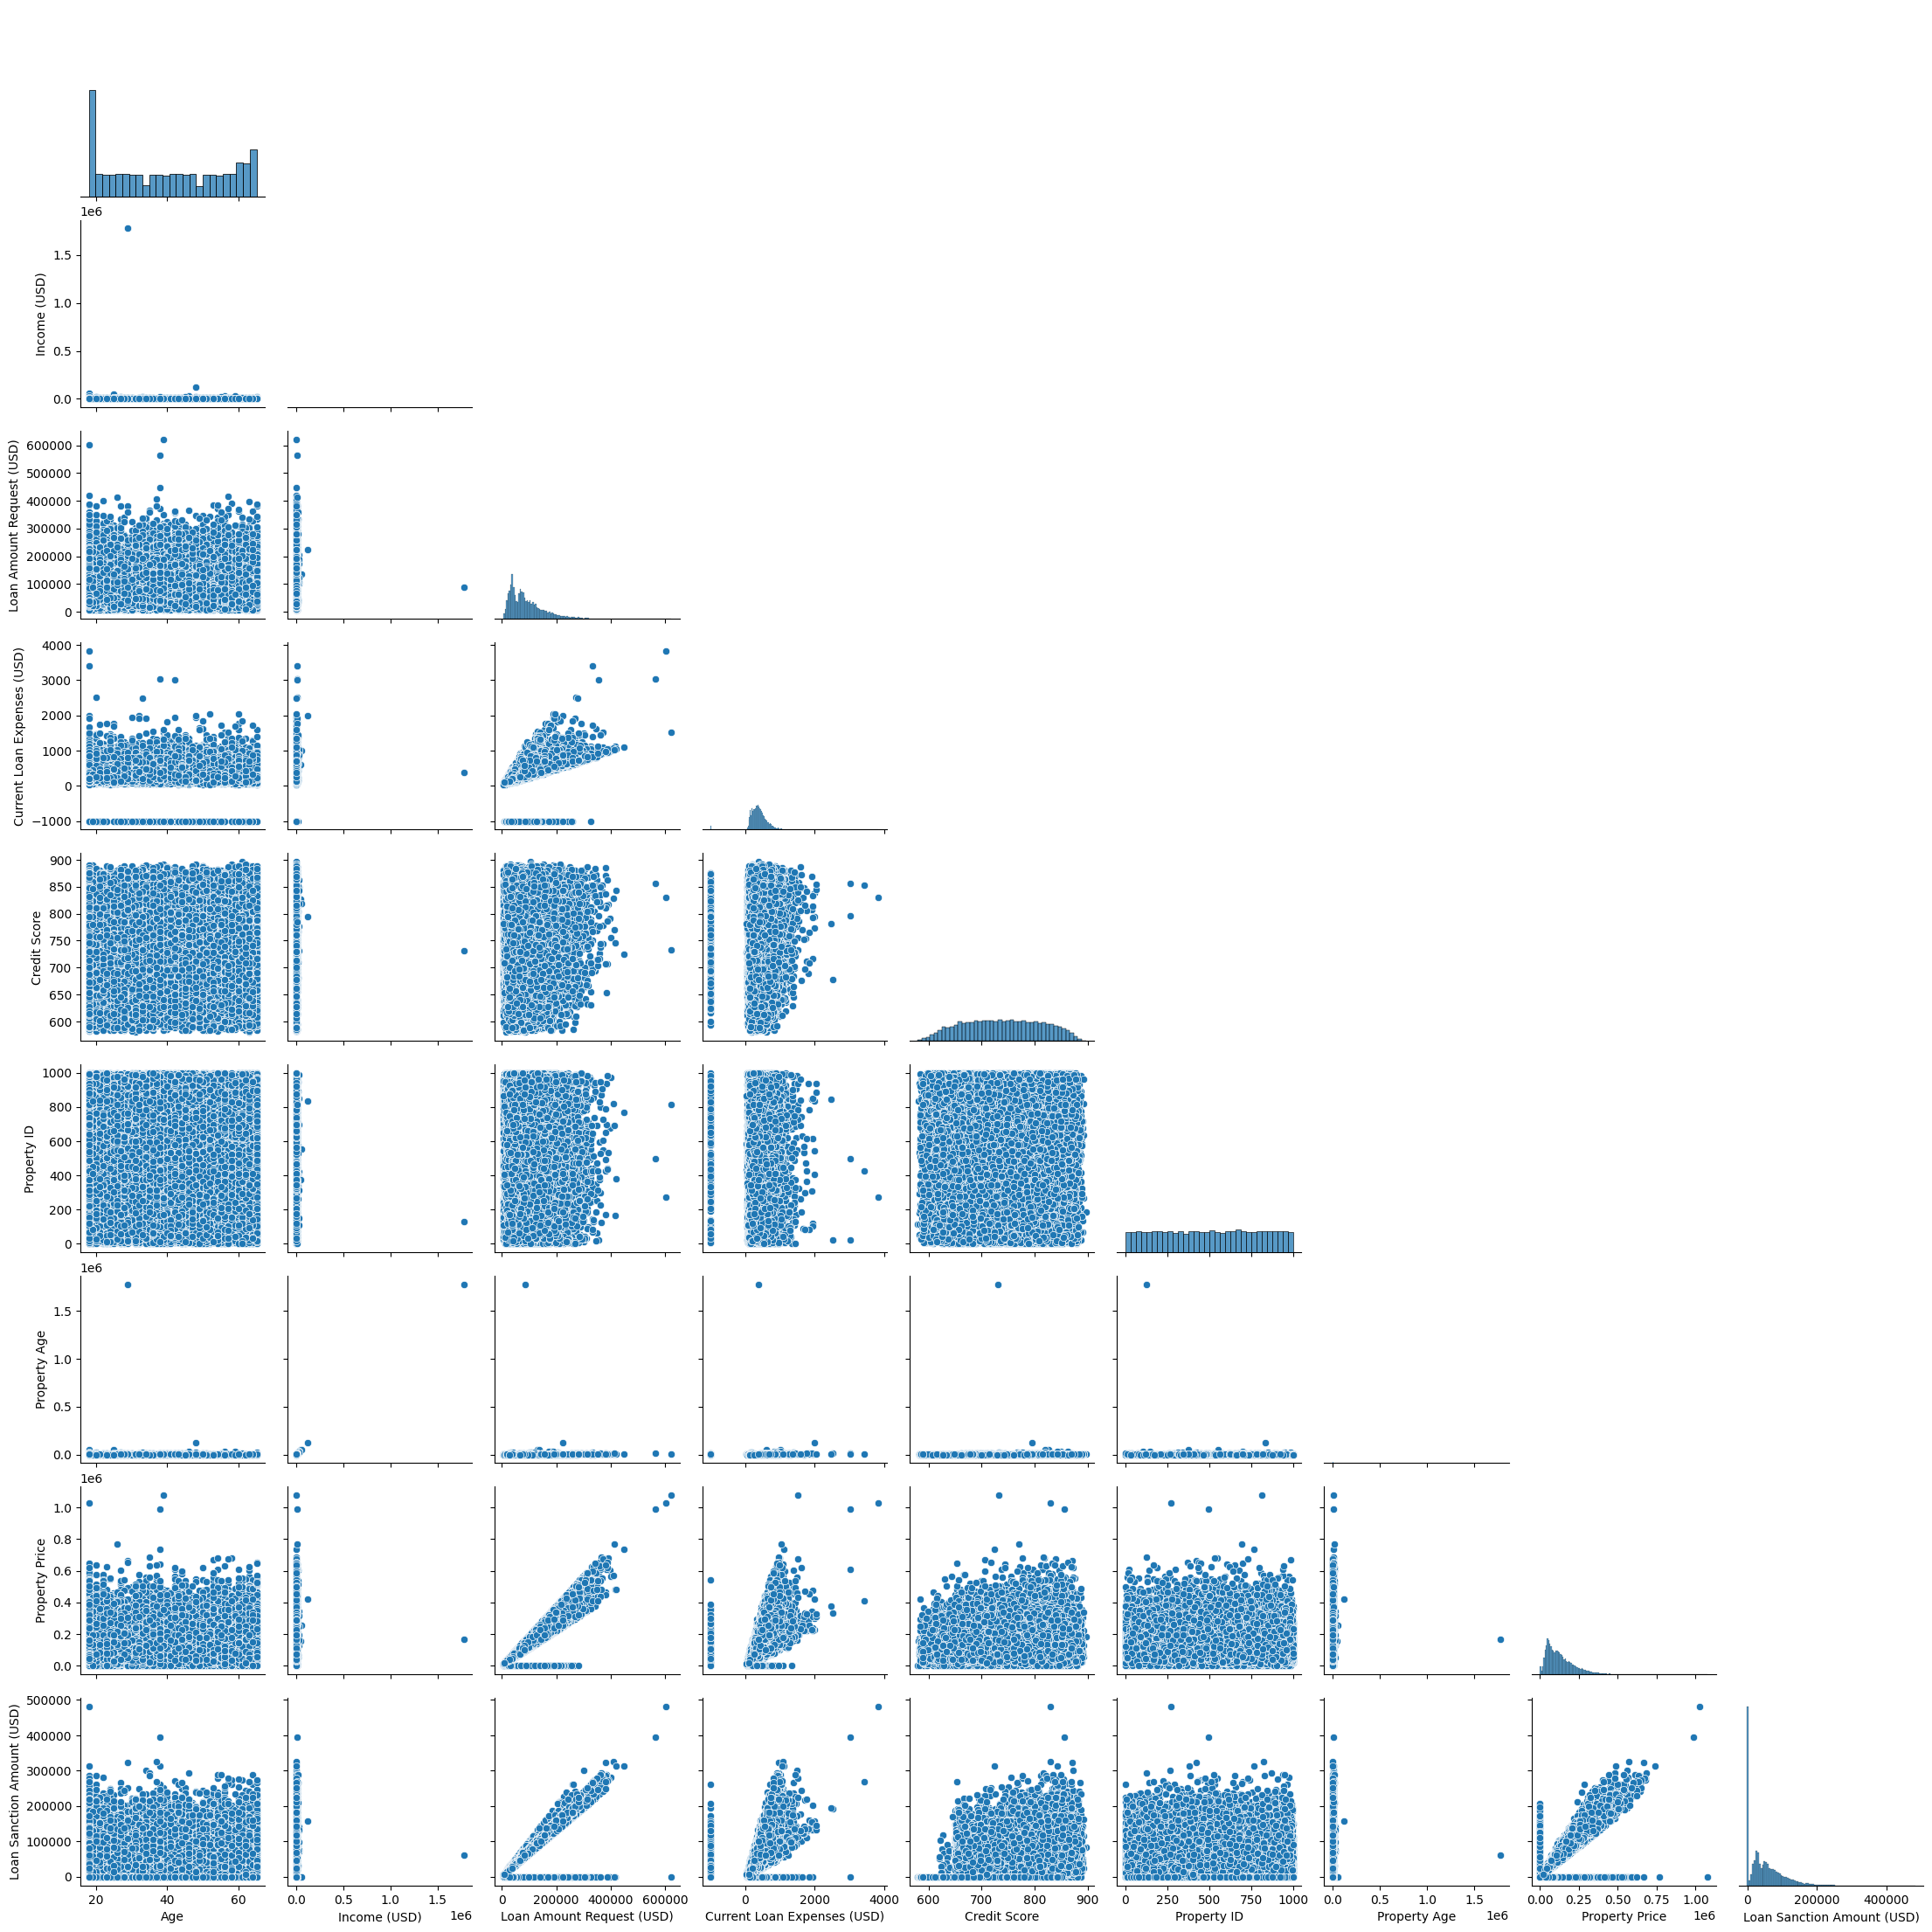

In [76]:
sns.pairplot(df.drop(['Dependents','No. of Defaults','Property Type','Co-Applicant'],axis=1),corner=True)
plt.show()

Interpretation:
- There is a positive correlation between the loan amount request and the current loan expenses.
- There is also a perfect positive correlation between the income and the property age.
- There is a colleration between property price and loan amount request.
- There is a colleration between loan sanction amount and loan amount request.
- We also find a correlation between the property price and current loan expenses.
- There is a correlation between loan sanction amount and current loan expenses.
- There is a correlation between property price and loan sanction amount.

In [77]:
df[['Loan Amount Request (USD)','Loan Sanction Amount (USD)']]

,Loan Amount Request (USD),Loan Sanction Amount (USD)
0,72809.580000,54607.180000
1,46837.470000,37469.980000
2,45593.040000,36474.430000
3,80057.920000,56040.540000
4,113858.890000,74008.280000
...,...,...
29995,76657.900000,68992.110000
29996,66595.140000,46616.600000
29997,81410.080000,61057.560000
29998,142524.100000,99766.870000


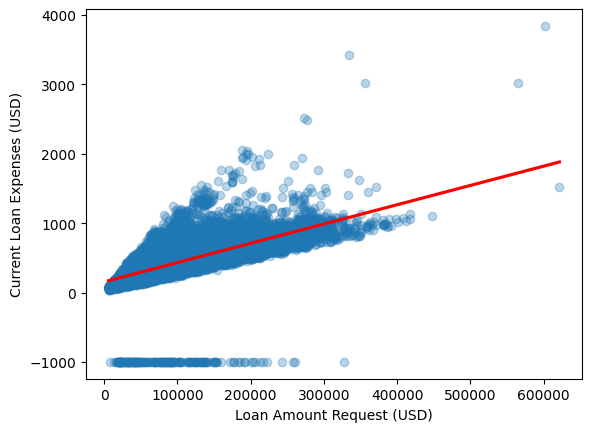

In [ ]:
# Loan amount request vs current loan expenses
sns.regplot(x='Loan Amount Request (USD)',y='Current Loan Expenses (USD)',data=df,line_kws={'color':'red'},scatter_kws={'alpha':0.3})
plt.show()

Interpretation:
- The more the loan amount requested, the more the current loan expenses.

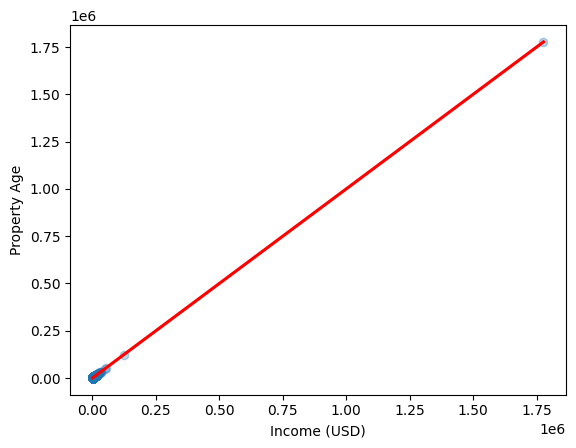

In [3]:
# Income vs property age

sns.regplot(x='Income (USD)',y='Property Age',data=df,line_kws={'color':'red'},scatter_kws={'alpha':0.3})
plt.show()

### Interpretation:
- We have a perfect correlation between the income and the property age. The more the income, the older the property.

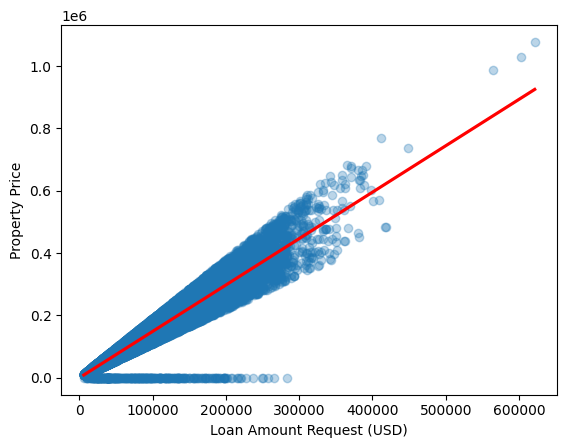

In [4]:
# Loan amount request vs property price

sns.regplot(x='Loan Amount Request (USD)',y='Property Price',data=df,line_kws={'color':'red'},scatter_kws={'alpha':0.3})
plt.show()

### Interpretation
- Higher the loan amount requested, higher the property price

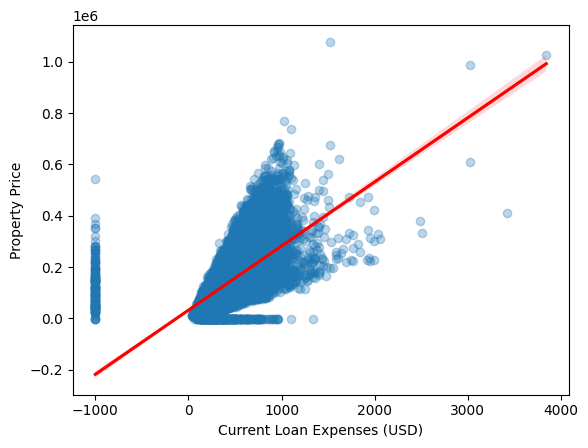

In [5]:
# Current loan expenses vs property price

sns.regplot(x='Current Loan Expenses (USD)',y='Property Price',data=df,line_kws={'color':'red'},scatter_kws={'alpha':0.3})
plt.show()

### Interpretation
- as loan expenses increases, property price tends to increase as well (red line)
- Data points are widely scattered, this tells us, loan expenses alone don't strongly explain property prices i.e other factors matter when it comes to determining the property prices

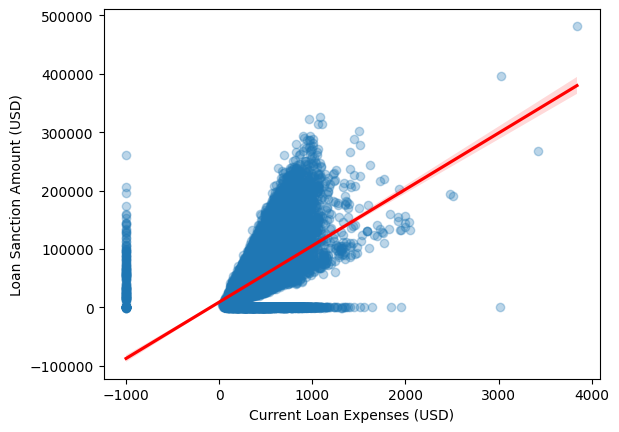

In [6]:
# Current loan expenses vs Loan sanctioned amount

sns.regplot(x='Current Loan Expenses (USD)',y='Loan Sanction Amount (USD)',data=df,line_kws={'color':'red'},scatter_kws={'alpha':0.3})
plt.show()

### Interpretation
- current laon expenses show positive relationship with sanctioned amounts

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

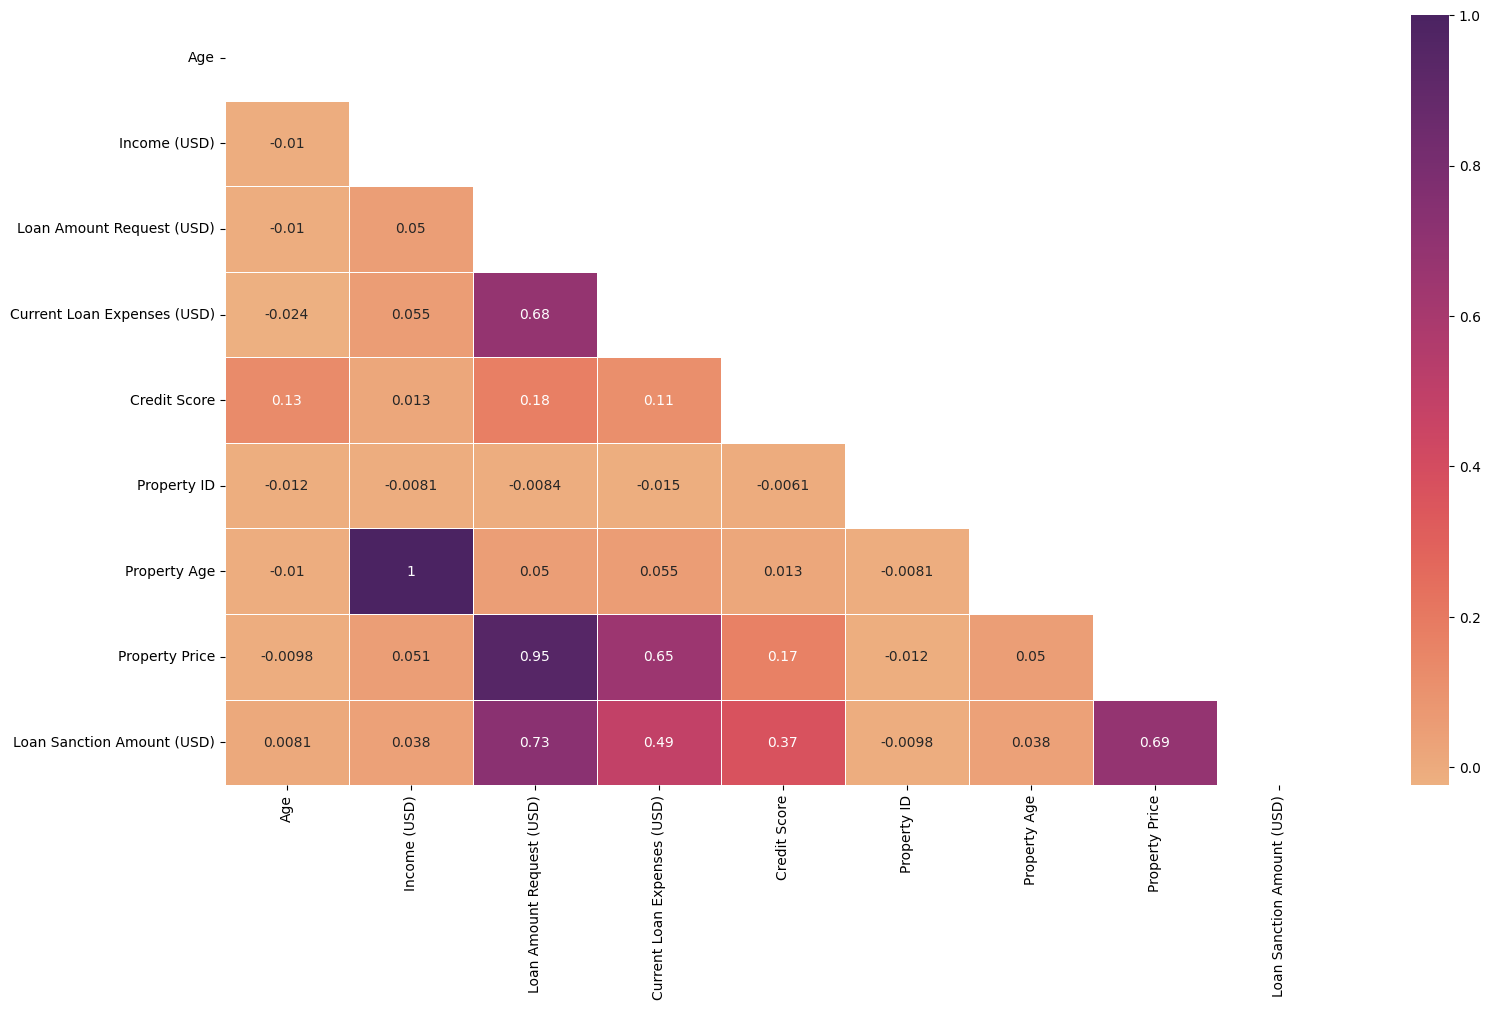

In [9]:
# Correlation Analysis
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_corr = df_numeric.drop(['Dependents','No. of Defaults','Property Type','Co-Applicant'],axis=1).corr()
# Get the lower triangle of the correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,10))
# seaborn heatmap
sns.heatmap(df_corr, annot=True, cmap='flare',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

### Interpretation

- Loan Amount Request and Property Price are extremely correlated (0.95), indicating loan requests closely track property value.
- Loan Sanction Amount is primarily driven by the requested loan amount (0.73) and property price (0.69).
- Current Loan Expenses strongly relate to loan requests (0.68) and moderately influence sanctions (0.49).
- Credit Score has a moderate supporting role (0.37) in determining sanctioned amounts.
- Age, Income, Property Age, and Property ID show negligible influence, offering little predictive value.

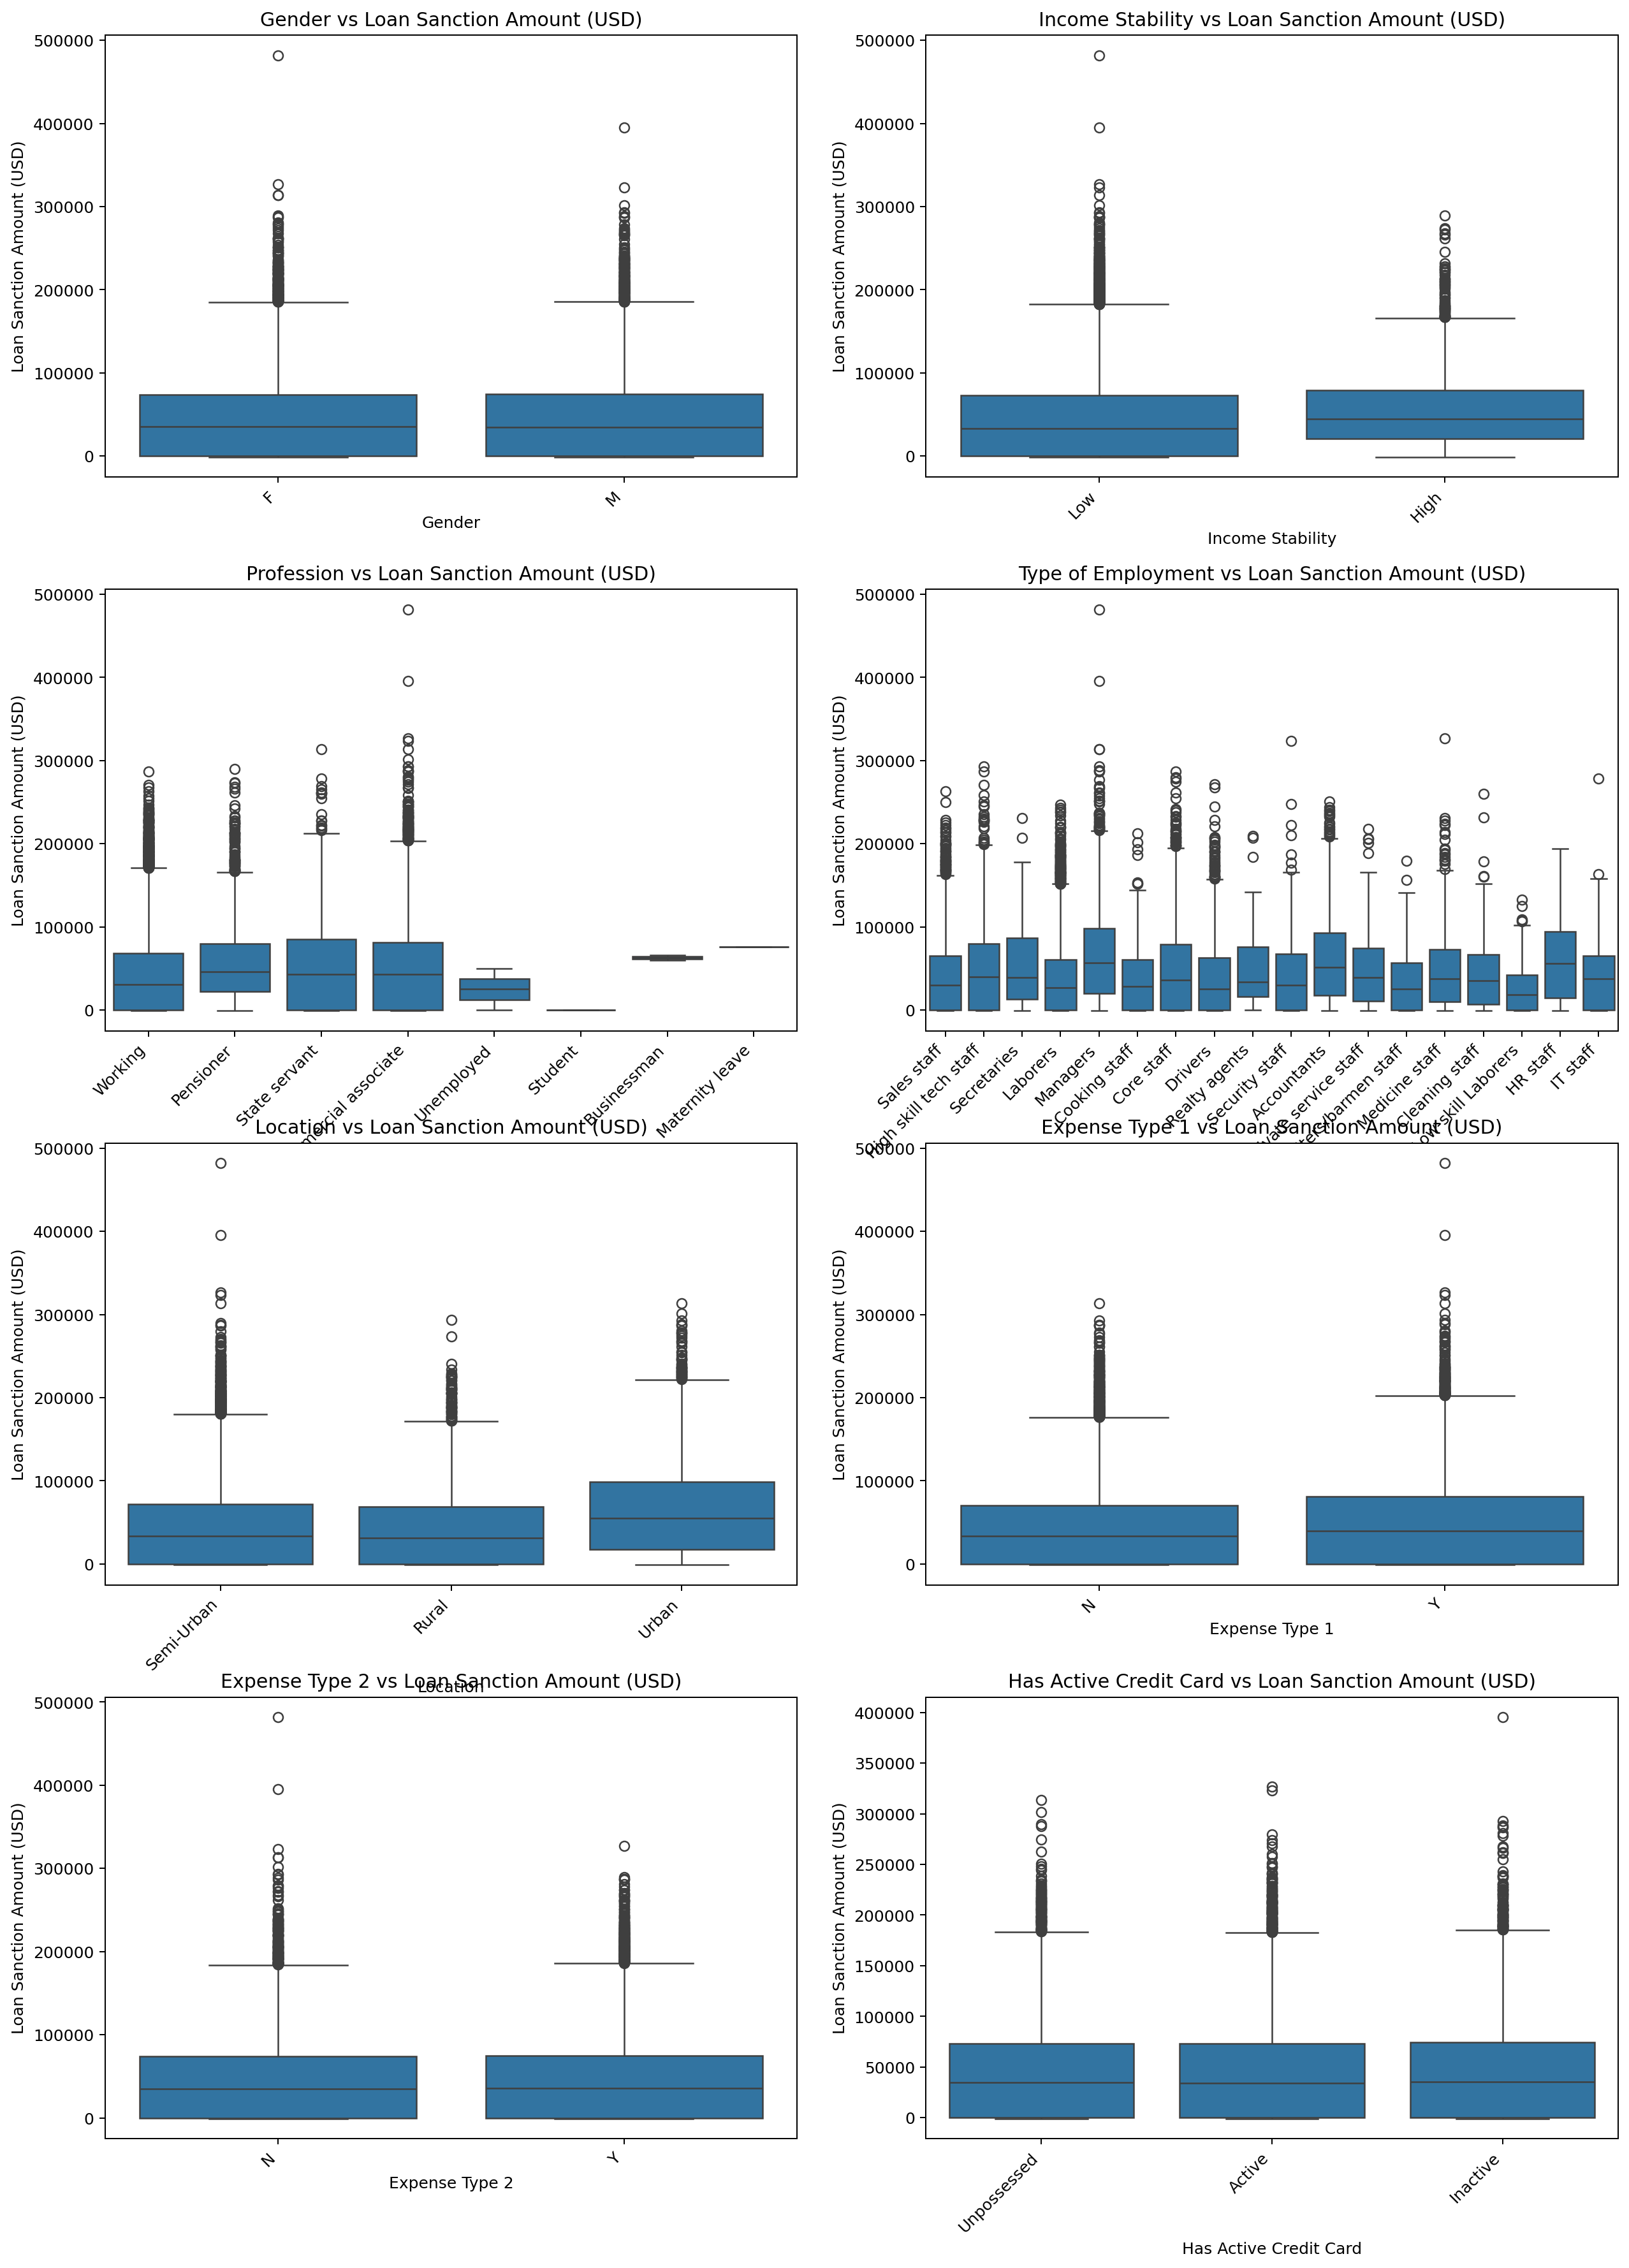

In [10]:
# Numerical vs categorical features (ANOVA)

fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)
cat_features = ['Gender','Income Stability','Profession','Type of Employment','Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location','loan_approval']
for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=df[cat_features[cat_ft_count]],y=df['Loan Sanction Amount (USD)'])
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs Loan Sanction Amount (USD)")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Loan Sanction Amount (USD)')
            cat_ft_count += 1
    break

### Interpretation

- Gender shows no significant impact on loan sanction amounts, with largely overlapping distributions.

- Higher income stability leads to higher median loan sanctions, indicating stability is a key lending factor.

- Profession and employment type strongly influence sanctions, with salaried and skilled roles receiving higher amounts.

- Urban applicants receive higher loan sanctions compared to rural and semi-urban locations.

- Active financial engagement (expenses, credit cards) is associated with slightly higher sanctioned amounts.